<font face = "Time New Roman" size = 6>Import need pacages</font>

In [1134]:
import warnings
warnings.filterwarnings('ignore')
from operator import itemgetter
import pandas as pd #dataframe
import numpy as np #mathematical computations
import matplotlib.pyplot as plt #visualization
import matplotlib
import seaborn as sns #visualization
import json #exporting columns
import pickle #saving the model
from sklearn.linear_model import LinearRegression #Linear Regression
from sklearn.linear_model import Lasso #Lasso Regression
from sklearn.tree import DecisionTreeRegressor #Decision Tree Regression
from sklearn.ensemble import RandomForestRegressor #Random Forest Regression
from sklearn.model_selection import train_test_split #Splitting the dataset into training and testing
from sklearn.model_selection import ShuffleSplit #Random shuffling
from sklearn.model_selection import cross_val_score #Score cross validation
from sklearn.model_selection import GridSearchCV #Hyper parameter tuning
from warnings import simplefilter #Filtering warnings
import seaborn as sns
import missingno as msno
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from matplotlib.pyplot import MultipleLocator

# <font face = "Time New Roman" size = 8>1. Observe the data</font>

<font face = "Time New Roman" size = 5> Import the data set and show the title </font>

<font face = "Time New Roman" size = 5> part3_result.csv is the file without deleting the Non registered organizations 
It's used to compare the result
All the file need be modified manumally before importing

In [1135]:
#Orginal_data = pd.read_csv('./Original_dataset.csv',encoding = "ISO-8859-1")
#Causes_data = pd.read_csv('./Original_Causes.csv',encoding = "ISO-8859-1")

In [1136]:
#combined_data = pd.merge(Orginal_data, Causes_data, how='left', on=['Campaign Id']) #Combined data set
#combined_data.to_csv('New_original_combined_data.csv', index=None)


In [1137]:
# Here need change the csv file from part3_result a little bit 
# Delete the space front and end of Campaign_Goal manually
# Change the number into number type instead of accounting type
# Or it can be changed into numeric number
combined_data = pd.read_csv('./Part3_result.csv',encoding = "ISO-8859-1")
#combined_data = pd.read_csv('./Final_data.csv',encoding = "ISO-8859-1")

In [1138]:
combined_data.shape

(10139, 79)

In [1139]:
columns_name = combined_data.columns
columns_name

Index(['Campaign Id*', 'Campaign Title_x', 'Receiving NPO Name*',
       'Receiving NPO Id*', 'NPO Status*',
       'Number of campaigns from the same NPO that started within the same Year Month',
       'Public Campaign Access*', 'Creator Type*', 'Creator Id*',
       'Campaign Status*', 'Actual Donation Amount', 'Distinct Donors',
       'Campaign Goal', 'Campaign Completion Rate', 'Days Left for Campaign',
       'Campaign Start Date', 'Campaign End Date',
       'NPO Ipc Status For Tax Deductibility', 'Campaign Image1 Id',
       'Campaign Image2 Id', 'Campaign Image3 Id', 'Campaign Image4 Id',
       'Campaign Image5 Id', 'Campaign Video', 'Impact Message 1',
       'Impact Message 2', 'Impact Message 3', 'Impact Message 4',
       'Impact Message 5', 'Custom Amount 1', 'Custom Amount 2',
       'Custom Amount 3', 'Custom Amount 4', 'Description of Campaign',
       'Description of NPO', 'Campaign Title_y', 'Org Cause Animal Welfare',
       'Org Cause Arts & Heritage', 'Org Cause

In [1140]:
# change the columns name
for i in range(len(columns_name)):
    combined_data = combined_data.rename(columns={columns_name[i] : columns_name[i].replace(" ","_")})

In [1141]:
columns_name = combined_data.columns

In [1142]:
for i in range(len(columns_name)):
    combined_data = combined_data.rename(columns={columns_name[i] : columns_name[i].replace('*','')})
combined_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Actual_Donation_Amount', 'Distinct_Donors',
       'Campaign_Goal', 'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date',
       'NPO_Ipc_Status_For_Tax_Deductibility', 'Campaign_Image1_Id',
       'Campaign_Image2_Id', 'Campaign_Image3_Id', 'Campaign_Image4_Id',
       'Campaign_Image5_Id', 'Campaign_Video', 'Impact_Message_1',
       'Impact_Message_2', 'Impact_Message_3', 'Impact_Message_4',
       'Impact_Message_5', 'Custom_Amount_1', 'Custom_Amount_2',
       'Custom_Amount_3', 'Custom_Amount_4', 'Description_of_Campaign',
       'Description_of_NPO', 'Campaign_Title_y', 'Org_Cause_Animal_Welfare',
       'Org_Cause_Arts_&_Heritage', 'Org_Cause_Childre

In [1143]:
combined_data = combined_data.rename(columns={'Actual_Donation_Amount' : 'Amount_raised'} )
combined_data = combined_data.rename(columns={'NPO_Ipc_Status_For_Tax_Deductibility' : 'Tax_duction_status'} )
combined_data = combined_data.rename(columns={'Scale_type' : 'Financial_Size'} )
combined_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Amount_raised', 'Distinct_Donors', 'Campaign_Goal',
       'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'Tax_duction_status',
       'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id',
       'Campaign_Image4_Id', 'Campaign_Image5_Id', 'Campaign_Video',
       'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3',
       'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1',
       'Custom_Amount_2', 'Custom_Amount_3', 'Custom_Amount_4',
       'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Comm

<AxesSubplot: >

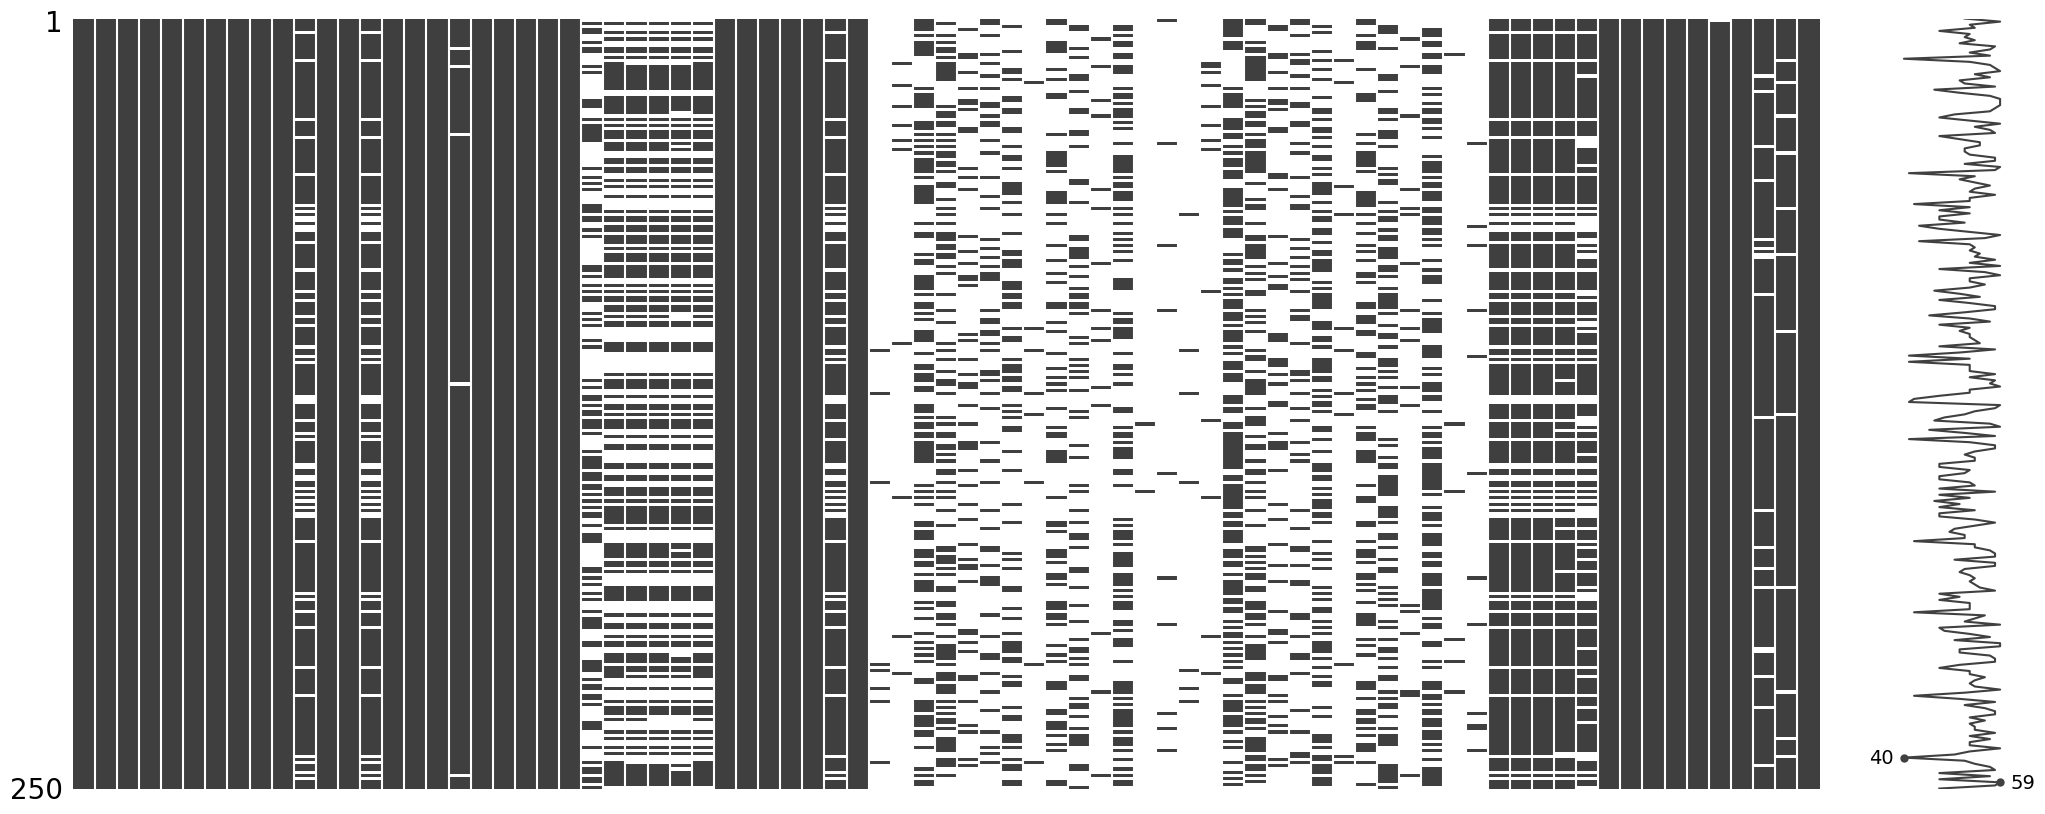

In [1144]:
msno.matrix(combined_data.sample(250))

In [1145]:
combined_data.columns #Show the columns of data set

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Amount_raised', 'Distinct_Donors', 'Campaign_Goal',
       'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'Tax_duction_status',
       'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id',
       'Campaign_Image4_Id', 'Campaign_Image5_Id', 'Campaign_Video',
       'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3',
       'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1',
       'Custom_Amount_2', 'Custom_Amount_3', 'Custom_Amount_4',
       'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Comm

In [1146]:
extract_data = combined_data #[Need_variable]


<AxesSubplot: >

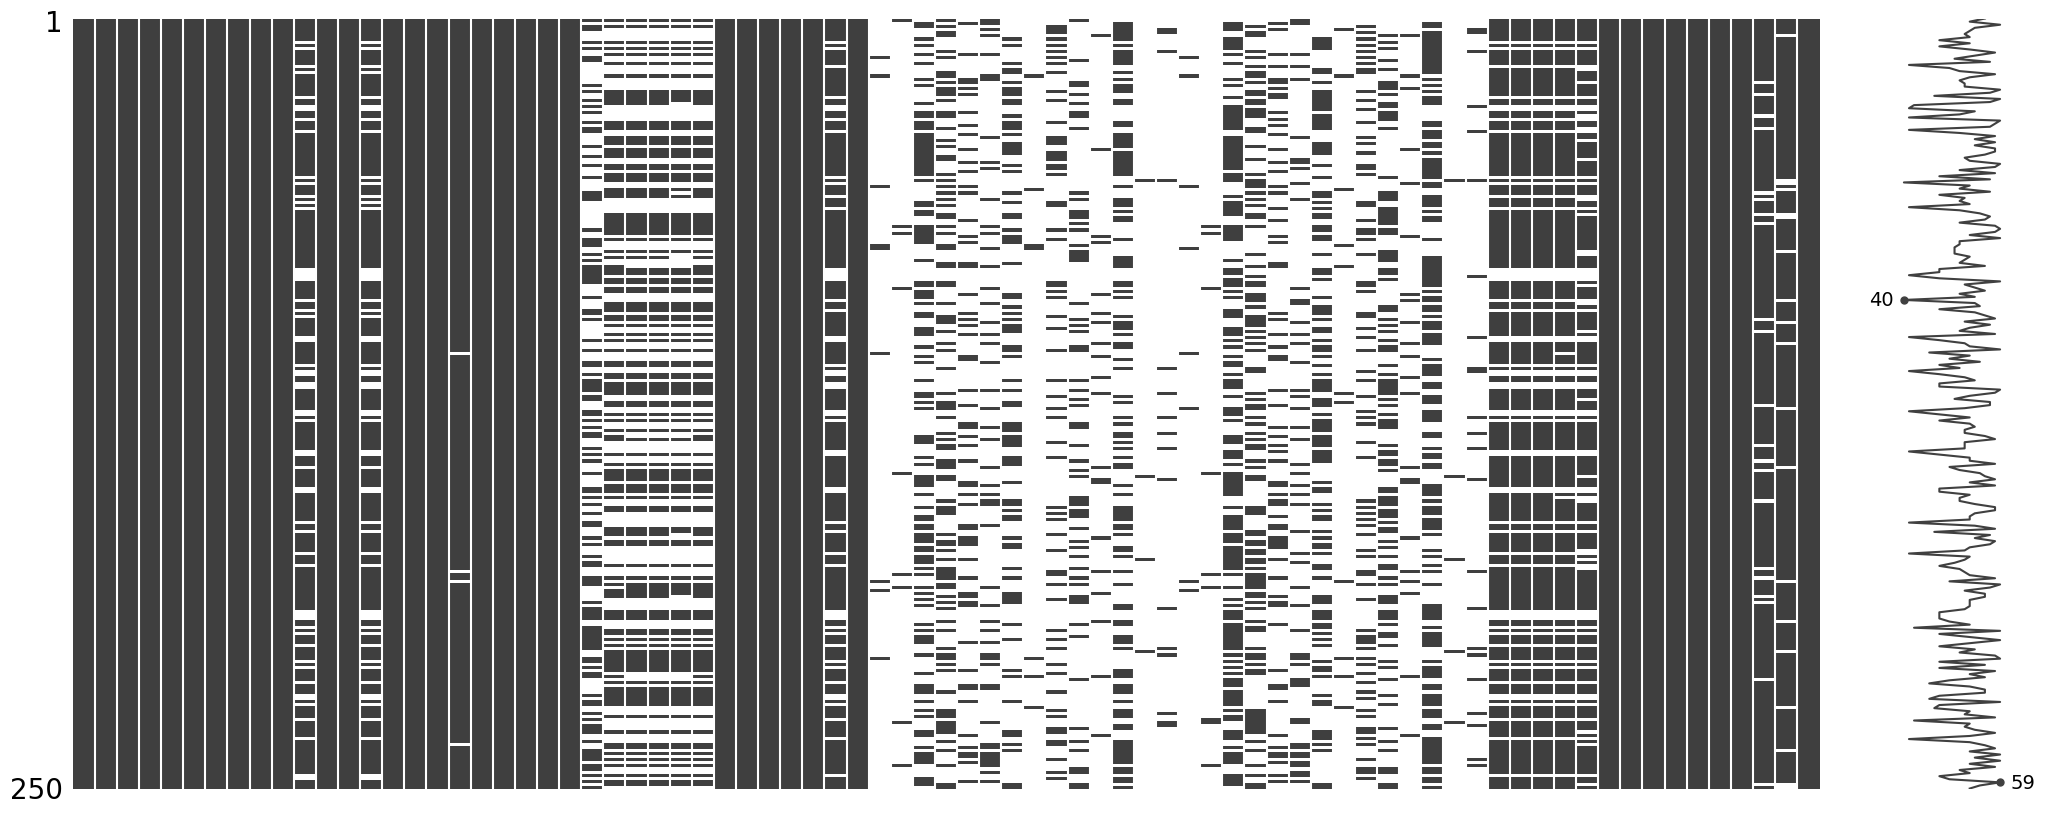

In [1147]:
msno.matrix(extract_data.sample(250))

In [1148]:
extract_data = extract_data.fillna('0')  #fill some missing causes data with 0

<AxesSubplot: >

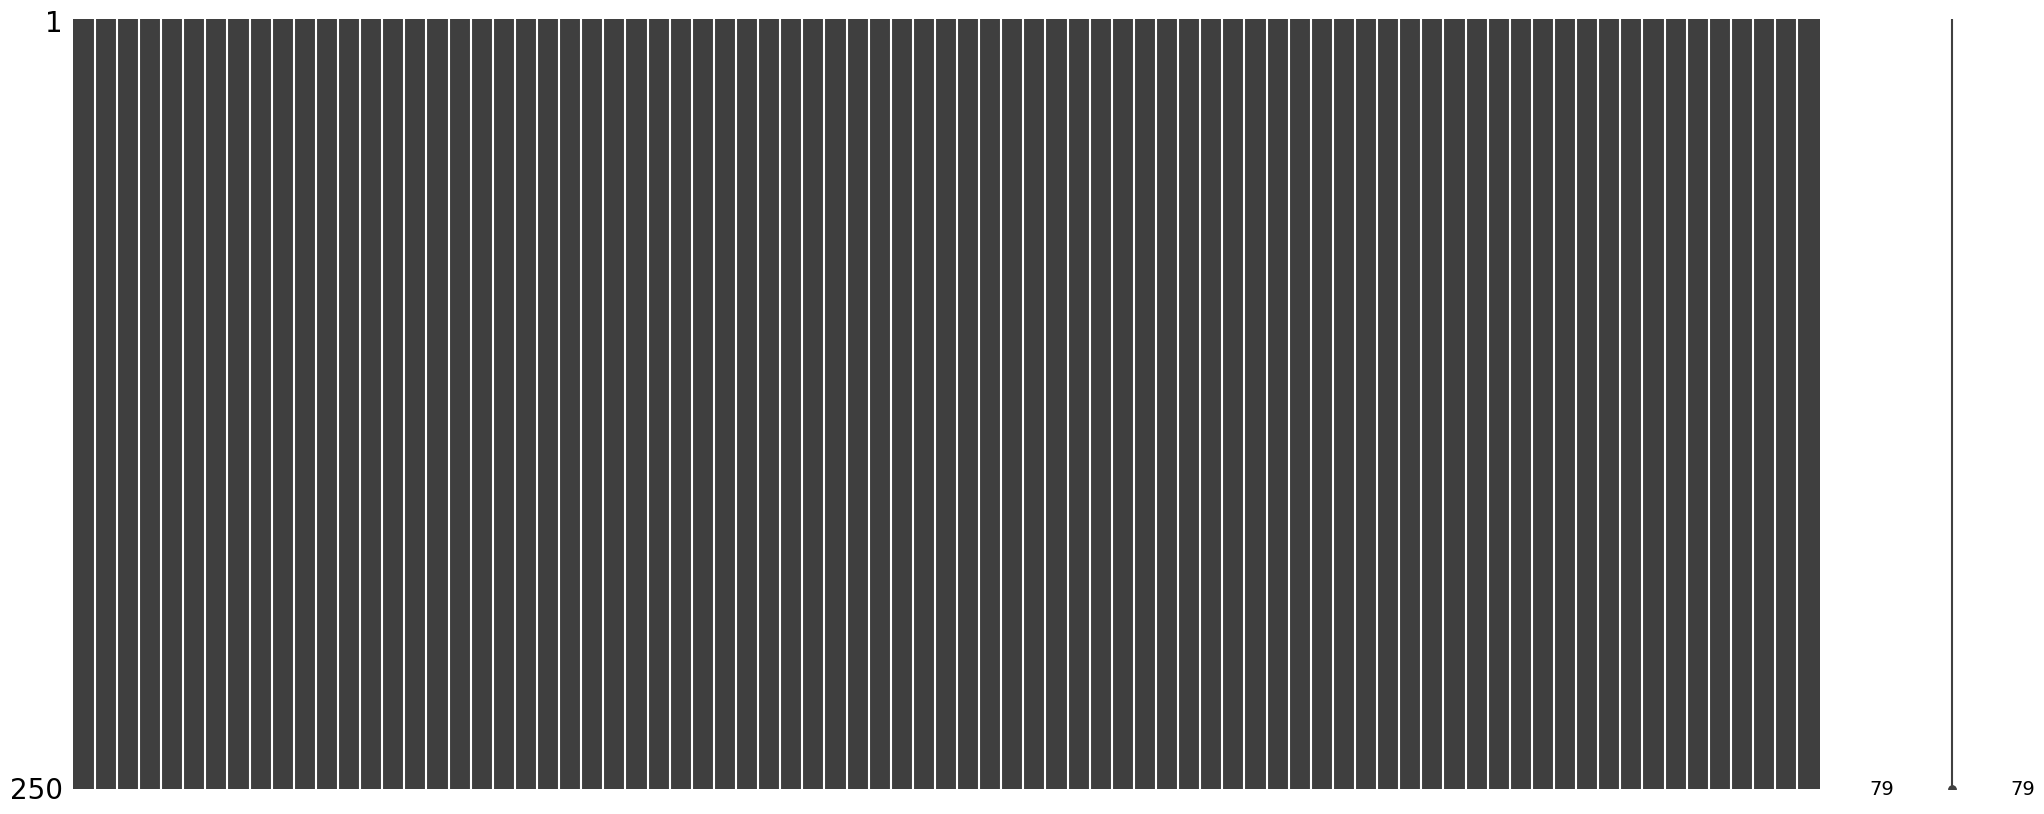

In [1149]:
msno.matrix(extract_data.sample(250))

In [1150]:

Total_Rows = combined_data.shape[0]  #Get the rows number 
print(Total_Rows)  #Print out total rows number 

10139


In [1151]:
extract_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10139 entries, 0 to 10138
Data columns (total 79 columns):
 #   Column                                                                         Non-Null Count  Dtype 
---  ------                                                                         --------------  ----- 
 0   Campaign_Id                                                                    10139 non-null  int64 
 1   Campaign_Title_x                                                               10139 non-null  object
 2   Receiving_NPO_Name                                                             10139 non-null  object
 3   Receiving_NPO_Id                                                               10139 non-null  int64 
 4   NPO_Status                                                                     10139 non-null  bool  
 5   Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month  10139 non-null  int64 
 6   Public_Campaign_Access        

<font face = "Time New Roman" size = 5>There is no donations per donor, So add a columns of donations per donor</font>

In [1152]:
extract_data['Distinct_Donors'] = pd.to_numeric( extract_data['Distinct_Donors']) 
extract_data['Amount_raised'] = pd.to_numeric( extract_data['Amount_raised']) 

In [1153]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status',
       'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Amount_raised', 'Distinct_Donors', 'Campaign_Goal',
       'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'Tax_duction_status',
       'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id',
       'Campaign_Image4_Id', 'Campaign_Image5_Id', 'Campaign_Video',
       'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3',
       'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1',
       'Custom_Amount_2', 'Custom_Amount_3', 'Custom_Amount_4',
       'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Comm

In [1154]:
extract_data['Creator_Type'].unique()

array(['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY',
       'CORPORATE', 'GOVERNMENT', 'SCHOOL'], dtype=object)

# <font face = "Time New Roman" size = 8> 2. Data processing

<font face = "Time New Roman" size = 5> The format of the date needs to be modified and the duration will be calculated below </font>

In [1155]:
month_dictionary = {'Jan':'1',
 'Feb':'2',
 'Mar':'3',
 'Apr':'4',
 'May':'5',
 'Jun':'6',
 'Jul':'7',
 'Aug':'8',
 'Sep':'9',
 'Oct':'10',
 'Nov':'11',
 'Dec':'12'}
extract_data['Campaign_Start_Day'] = '0'
extract_data['Campaign_Start_Month'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_End_Day'] = '0'
extract_data['Campaign_End_Month'] = '0'
extract_data['Campaign_End_Year'] = '0'
extract_data['Campaign_Start'] = '0'
extract_data['Campaign_End'] = '0'
extract_data['Campaign_Start_Year'] = '0'
extract_data['Campaign_Duration'] = '0'
i = 0

# Get the detail infomation of data
for row in extract_data['Campaign_Start_Date']:
    extract_data.loc[i, 'Campaign_Start_Day'] = extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_Start_Month'] = month_dictionary[ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[1] ] 
    extract_data.loc[i, 'Campaign_Start_Year'] = '20'+ extract_data.loc[i, 'Campaign_Start_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_End_Day'] = extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[0]
    extract_data.loc[i, 'Campaign_End_Month'] = month_dictionary[extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[1]]
    extract_data.loc[i, 'Campaign_End_Year'] = '20' + extract_data.loc[i, 'Campaign_End_Date'].split('-', 3 )[2]
    extract_data.loc[i, 'Campaign_Start'] = extract_data.loc[i, 'Campaign_Start_Year'] + '-' + extract_data['Campaign_Start_Month'].iloc[i] + '-' + extract_data['Campaign_Start_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_End'] = extract_data['Campaign_End_Year'].iloc[i] + '-' + extract_data['Campaign_End_Month'].iloc[i] + '-' + extract_data['Campaign_End_Day'].iloc[i]
    extract_data.loc[i, 'Campaign_Duration'] = (datetime.strptime(extract_data.loc[i, 'Campaign_End'], '%Y-%m-%d') - datetime.strptime(extract_data.loc[i,'Campaign_Start'], '%Y-%m-%d')).days
#   if extract_data.loc[i, 'Campaign_Duration'] < 0:
#     extract_data.loc[i, 'Campaign_Duration'] = 0
    i += 1

## <font face = "Time New Roman" size = 6> Change variables to categorial 

<font face = "Time New Roman" size = 5>Classfy video into “0” and ”1“ two categories</font>

In [1156]:
Video_or_not = lambda x0: (x0 != '0').astype(np.int)

extract_data["Campaign_Video"] = Video_or_not(extract_data["Campaign_Video"])
extract_data["Campaign_Video"].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> Classfy Creator_type Sector Campaign_Start_Year

In [1157]:
num_deductibility = 0
extract_data['Donation_per_donor'] = 0
Creator_type = ['NPO', 'INDIVIDUAL', 'Corporate', 'OTHER', 'COMMUNITY', 'CORPORATE', 'GOVERNMENT', 'SCHOOL']
Sector = ['Social and Welfare', 'Others', 'Health', 'Arts and Heritage', 'Sports', 'Education', 'Religious', 'Community']
extract_data['Sector_type'] = 0
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']
for j in range(len(extract_data["Amount_raised"])):
    if extract_data["Distinct_Donors"].iloc[j] != 0:
        extract_data['Donation_per_donor'].iloc[j] = extract_data['Amount_raised'].iloc[j]/extract_data['Distinct_Donors'].iloc[j]
    else:
        extract_data['Donation_per_donor'].iloc[j] = 0

    if extract_data['Tax_duction_status'].iloc[j] == True:
        extract_data.loc[j, 'Tax_duction_status'] = 1
        num_deductibility += 1
    else:
        extract_data.loc[j, 'Tax_duction_status'] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[0]:
        extract_data['Creator_Type'].iloc[j] = 0
    if extract_data['Creator_Type'].iloc[j] == Creator_type[1]:
        extract_data['Creator_Type'].iloc[j] = 1
    if extract_data['Creator_Type'].iloc[j] == Creator_type[2]:
        extract_data['Creator_Type'].iloc[j] = 2
    if extract_data['Creator_Type'].iloc[j] == Creator_type[3]:
        extract_data['Creator_Type'].iloc[j] = 3
    if extract_data['Creator_Type'].iloc[j] == Creator_type[4]:
        extract_data['Creator_Type'].iloc[j] = 4
    if extract_data['Creator_Type'].iloc[j] == Creator_type[5]:
        extract_data['Creator_Type'].iloc[j] = 5
    if extract_data['Creator_Type'].iloc[j] == Creator_type[6]:
        extract_data['Creator_Type'].iloc[j] = 6
    if extract_data['Creator_Type'].iloc[j] == Creator_type[7]:
        extract_data['Creator_Type'].iloc[j] = 7

    if extract_data['Sector'].iloc[j] == Sector[0]:
        extract_data['Sector_type'].iloc[j] = 0
    if extract_data['Sector'].iloc[j] == Sector[1]:
        extract_data['Sector_type'].iloc[j] = 1
    if extract_data['Sector'].iloc[j] == Sector[2]:
        extract_data['Sector_type'].iloc[j] = 2
    if extract_data['Sector'].iloc[j] == Sector[3]:
        extract_data['Sector_type'].iloc[j] = 3
    if extract_data['Sector'].iloc[j] == Sector[4]:
        extract_data['Sector_type'].iloc[j] = 4
    if extract_data['Sector'].iloc[j] == Sector[5]:
        extract_data['Sector_type'].iloc[j] = 5
    if extract_data['Sector'].iloc[j] == Sector[6]:
        extract_data['Sector_type'].iloc[j] = 6
    if extract_data['Sector'].iloc[j] == Sector[7]:
        extract_data['Sector_type'].iloc[j] = 7

    
print("Number of deductibility:", num_deductibility)

Number of deductibility: 9633


In [1158]:
Campaign_Start_Year = ['2017', '2018', '2019', '2020', '2021', '2022']

extract_data['Campaign_Start_Year_category'] = 0
for j in range(len(extract_data["Amount_raised"])):
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[0]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 0
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[1]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 1
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[2]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 2
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[3]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 3
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[4]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 4
    if extract_data['Campaign_Start_Year'].iloc[j] == Campaign_Start_Year[5]:
        extract_data['Campaign_Start_Year_category'].iloc[j] = 5

In [1159]:
extract_data['Campaign_Funds_Raised'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Amount_raised']>0 :
        extract_data.loc[index,'Campaign_Funds_Raised'] = 1
    if extract_data.loc[index,'Financial_Size'] == 50000:
        extract_data.loc[index,'Financial_Size'] = 0
    if extract_data.loc[index,'Financial_Size'] == 200000:
        extract_data.loc[index,'Financial_Size'] = 1
    if extract_data.loc[index,'Financial_Size'] == 500000:
        extract_data.loc[index,'Financial_Size'] = 2
    if extract_data.loc[index,'Financial_Size'] == 250000:
        extract_data.loc[index,'Financial_Size'] = 3
    if extract_data.loc[index,'Financial_Size'] == 1000000:
        extract_data.loc[index,'Financial_Size'] = 4
    if extract_data.loc[index,'Financial_Size'] == 5000000:
        extract_data.loc[index,'Financial_Size'] = 5
    if extract_data.loc[index,'Financial_Size'] == 20000000:
        extract_data.loc[index,'Financial_Size'] = 6
    if extract_data.loc[index,'Financial_Size'] == 10000000:
        extract_data.loc[index,'Financial_Size'] = 7   


<font size =5 face = 'time new roman'> Calculate the numbers of "org_causes" and "camp_causes" </font>

In [1160]:
Org_causes = ['Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org_Cause_Elderly',
       'Org_Cause_Environment', 'Org_Cause_Families', 'Org_Cause_Health',
       'Org_Cause_Humanitarian', 'Org_Cause_Social_Service',
       'Org_Cause_Sports', 'Org_Cause_Women_&_Girls',
       ]
Cam_causes = ['Cam_Cause_Animal_Welfare', 'Cam_Cause_Arts_&_Heritage',
       'Cam_Cause_Children_&_Youth', 'Cam_Cause_Community',
       'Cam_Cause_Disability', 'Cam_Cause_Education', 'Cam_Cause_Elderly',
       'Cam_Cause_Environment', 'Cam_Cause_Families', 'Cam_Cause_Health',
       'Cam_Cause_Humanitarian', 'Cam_Cause_Social_Service',
       'Cam_Cause_Sports', 'Cam_Cause_Women_&_Girls']
Length_Org_causes = len(Org_causes)
Length_Cam_causes = len(Cam_causes)
extract_data['Org_causes'] = 0
extract_data['Cam_causes'] = 0

for j in range(Total_Rows):
    num_Org_causes = 0
    num_Cam_causes = 0
    for position1 in range(Length_Org_causes):
        num_Org_causes += 1 if extract_data[Org_causes[position1]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    for position2 in range(Length_Cam_causes):
        num_Cam_causes += 1 if extract_data[Cam_causes[position2]].iloc[j] != '0' else 0
    extract_data['Org_causes'].iloc[j] = num_Org_causes
    extract_data['Cam_causes'].iloc[j] = num_Cam_causes


<font face = "Time New Roman" size = 5>Add a columns of numbers of images</font>

In [1161]:
Image_Number = lambda x0,x1,x2,x3,x4: (x0 != 0).astype(np.int) +(x1 != 0).astype(np.int) + (x2 != 0).astype(np.int) + (x3 != 0).astype(np.int) + (x4 != 0).astype(np.int)
extract_data["Number_of_images"] =  Image_Number(extract_data["Campaign_Image1_Id"],extract_data["Campaign_Image2_Id"],extract_data["Campaign_Image3_Id"],extract_data["Campaign_Image4_Id"],extract_data["Campaign_Image5_Id"])

In [1162]:
# extract_data.to_csv('before_clean.csv')

# <font face = "Time New Roman" size = 8>3. Clean data

<font size =5 face = 'time new roman' >Here delete the rows where Campaign_Duration less than 1</font>

In [1163]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_Duration'] <= 1:
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where duraiton less than 0:", num)  
Total_Rows = extract_data.shape[0]


Total delete numbers where duraiton less than 0: 97


In [1164]:
Impact_msg_list = ['Impact_Message_1','Impact_Message_2','Impact_Message_3','Impact_Message_4','Impact_Message_5']
Msg_category_list = ['Msg1_category','Msg2_category','Msg3_category','Msg4_category','Msg5_category']
def sentence_length(s):
    return len([i for i in s.split(' ') if i])

#for j in range(len(Impact_msg_list)):
#    cnt=0
#    for s in extract_data[Impact_msg_list[j]]:
#        extract_data[Msg_category_list[j]].iloc[cnt] = 0 if sentence_length(s) <= 2 else (1 if sentence_length(s) <=7 else (2 if sentence_length(s) <=20 else  3))
#        cnt += 1
cnt=0

In [1165]:
# Nunber of description words
extract_data['Words_of_campaigns'] = 0
extract_data['Num_desc_NPO'] = 0
for index, row in extract_data.iterrows():
    
    extract_data.loc[index, 'Words_of_campaigns'] = sentence_length( str(extract_data.loc[index, 'Description_of_Campaign']))
    extract_data.loc[index, 'Num_desc_NPO'] = sentence_length( str(extract_data.loc[index, 'Description_of_NPO']))


<font face = "Time New Roman" size = 5> Delete the lines where NPO is blank

In [1166]:

num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Num_desc_NPO'] <= 1 and   extract_data.loc[index, 'Amount_raised']<=0 :
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete numbers where Num_desc_NPO less than 1:", num1)  
Total_Rows = extract_data.shape[0]


Total delete numbers where Num_desc_NPO less than 1: 1987


<font face = "Time New Roman" size = 5> Re-consider description contents again

In [1167]:
num2 = 0
num3 = 0
for index, row in extract_data.iterrows():
    if ("TEST" in str(extract_data.loc[index, 'Description_of_Campaign']).upper() or "TEST" in str(extract_data.loc[index, 'Campaign_Title_x']).upper()) and extract_data.loc[index, 'Words_of_campaigns']< 10:
        extract_data.drop(index, inplace=True)
        num2 += 1
'''
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Words_of_campaigns']< 5:
        extract_data.drop(index, inplace=True)
        num2 += 1
'''
print("Total delete numbers:", num2)  


Total delete numbers: 0


In [1168]:
# extract_data['Cam_Org_causes'] = extract_data['Org_causes']-extract_data['Cam_causes']

<font face = "Time New Roman" size = 5> Average donation per donator

In [1169]:
# extract_data['Avg_donation_amount'] =  extract_data['Amount_raised']/extract_data['Distinct_Donors']

<font size =5 face = 'time new roman' >Here delete the rows where Amount_raised is 0 but Distinct_Donors bigger than 0</font>

In [1170]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Amount_raised'] <= 0 and extract_data.loc[index,'Distinct_Donors'] > 0 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Amount_raised less than 0 but Distinct_Donors bigger than 0:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Amount_raised less than 0 but Distinct_Donors bigger than 0: 58


<font face = "Time New Roman" size = 5> Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106

In [1171]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] == 984 or extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] == 106:
    #if extract_data.loc[index,'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month'] > 16:
        extract_data.drop(index, inplace=True)
        num += 1

print("Total delete numbers where Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106:", num)  
Total_Rows = extract_data.shape[0]


Total delete numbers where Remove campaigns where Number of campaigns from the same NPO that started within the same Year Month = 984 or = 106: 37


<font face = "Time New Roman" size = 5> Remove all active campaigns. The last campaign should be as of END OCT 2022

In [1172]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_Status'].upper() != "ENDED" :
        extract_data.drop(index, inplace=True)
        num += 1
print("Total delete numbers where Remove all active campaigns. The last campaign should be as of END OCT 2022:", num)  
Total_Rows = extract_data.shape[0]

Total delete numbers where Remove all active campaigns. The last campaign should be as of END OCT 2022: 612


<font face = "Time New Roman" size = 5> Remove 40,000, 56,000, 80,000, and 100,000

In [1173]:
num = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Custom_Amount_4'] >=40000 :
        extract_data.drop(index, inplace=True)
        num += 1
print("Remove 40,000, 56,000, 80,000, and 100,000:", num)  
Total_Rows = extract_data.shape[0]

Remove 40,000, 56,000, 80,000, and 100,000: 8


In [1174]:
extract_data.shape

(7340, 95)

<font face = "Time New Roman" size = 5> Add new column call Campaign Funds Raised

In [1175]:
extract_data.shape

(7340, 95)

In [1176]:
#extract_data.to_csv("Cleaned_data.csv")

In [1177]:
extract_data['Default_Contribution'] = (extract_data['Custom_Amount_1']+extract_data['Custom_Amount_2'] +extract_data['Custom_Amount_3'] + extract_data['Custom_Amount_4'] )/4


# <font face = "Time New Roman" size = 8>4. Other Processing

<font size =5 face = 'time new roman' >Polarity</font>

In [1178]:
'''
extract_data['Msg1_polarity'] = 0
extract_data['Msg1_subjectivity'] = 0
extract_data['Msg2_polarity'] = 0
extract_data['Msg2_subjectivity'] = 0
extract_data['Msg3_polarity'] = 0
extract_data['Msg3_subjectivity'] = 0
extract_data['Msg4_polarity'] = 0
extract_data['Msg4_subjectivity'] = 0
extract_data['Msg5_polarity'] = 0
extract_data['Msg5_subjectivity'] = 0


extract_data['Description_Campaign_polarity'] = 0
#extract_data['Description_Campaign_subjectivity'] = 0

from textblob import TextBlob
# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数
# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的
#Impact_msg_list = ['Impact Message 1','Impact Message 2','Impact Message 3','Impact Message 4','Impact Message 5','Description of Campaign']
Impact_msg_list = ['Description_of_Campaign']
#Msg_polarity_list = ['Msg1_polarity','Msg2_polarity','Msg3_polarity','Msg4_polarity','Msg5_polarity','Description_Campaign_polarity']
Msg_polarity_list = ['Description_Campaign_polarity']
#Msg1_subjectivity_list = ['Msg1_subjectivity','Msg2_subjectivity','Msg3_subjectivity','Msg4_subjectivity','Msg5_subjectivity','Description_Campaign_subjectivity']
for j in range(len(Impact_msg_list)):
    t=0
    for i in extract_data[Impact_msg_list[j]]:
        blob = TextBlob(str(i))
        sentiment = blob.sentiment
        extract_data[Msg_polarity_list[j]].iloc[t] = sentiment.polarity
        #extract_data[Msg1_subjectivity_list[j]].iloc[t] = sentiment.subjectivity
        t+=1
# sum the total five messages polarity and subjectivity 
#extract_data["Total_Msg_polarity"] = extract_data["Msg1_polarity"]+extract_data["Msg2_polarity"]+extract_data["Msg3_polarity"]+extract_data["Msg4_polarity"]+extract_data["Msg5_polarity"]
#extract_data["Total_Msg_subjectivity"] = extract_data["Msg1_subjectivity"]+extract_data["Msg2_subjectivity"]+extract_data["Msg3_subjectivity"]+extract_data["Msg4_subjectivity"]+extract_data["Msg5_subjectivity"]
extract_data.iloc[0:30,28:]
'''

'\nextract_data[\'Msg1_polarity\'] = 0\nextract_data[\'Msg1_subjectivity\'] = 0\nextract_data[\'Msg2_polarity\'] = 0\nextract_data[\'Msg2_subjectivity\'] = 0\nextract_data[\'Msg3_polarity\'] = 0\nextract_data[\'Msg3_subjectivity\'] = 0\nextract_data[\'Msg4_polarity\'] = 0\nextract_data[\'Msg4_subjectivity\'] = 0\nextract_data[\'Msg5_polarity\'] = 0\nextract_data[\'Msg5_subjectivity\'] = 0\n\n\nextract_data[\'Description_Campaign_polarity\'] = 0\n#extract_data[\'Description_Campaign_subjectivity\'] = 0\n\nfrom textblob import TextBlob\n# polarity项为文本积极性，是在[-1.0，1.0]范围内的浮点数\n# subjectivity项为主观评分，是在[0.0，1.0]范围内的浮点数，其中0.0是非常客观的，而1.0是非常主观的\n#Impact_msg_list = [\'Impact Message 1\',\'Impact Message 2\',\'Impact Message 3\',\'Impact Message 4\',\'Impact Message 5\',\'Description of Campaign\']\nImpact_msg_list = [\'Description_of_Campaign\']\n#Msg_polarity_list = [\'Msg1_polarity\',\'Msg2_polarity\',\'Msg3_polarity\',\'Msg4_polarity\',\'Msg5_polarity\',\'Description_Campaign_polarity\']\nMsg_

<font face = "Time New Roman" size = 6> Future tense

In [1179]:
# It is accomplished mainly by using word_tokenize package.
# import the releated package
from nltk import word_tokenize, pos_tag
# This package is used for spliting the sentence
# Here is how it works
sentence = "Your donation will testament that suicide prevention is everyone's business."
tokens = word_tokenize(sentence)
print(tokens)
# ['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
# Tag different compoments in the sentence
print(pos_tag(tokens))
'''
Here is the result after taging
[('Your', 'PRP$'),
 ('donation', 'NN'),
 ('will', 'MD'),
 ('testament', 'VB'),
 ('that', 'IN'),
 ('suicide', 'JJ'),
 ('prevention', 'NN'),
 ('is', 'VBZ'),
 ('everyone', 'NN'),
 ("'s", 'POS'),
 ('business', 'NN'),
 ('.', '.')]
'''
# MD modal could, will
# So we can use the number of MD tags to judge the future tense.
# Another example   can.may.might.could.should.would.will.must.
sentence2 = 'Your donation will testament that suicide prevention is everyone business.Your $500 donation (5 tins) can contribute towards \
providing a month of meals for a child in HomeSweetHome@Admiralty (HSH).'
text = word_tokenize(sentence2)
tagged = pos_tag(text)

print( ([word for word in tagged if word[1] == "MD"]))
# The result is 2


['Your', 'donation', 'will', 'testament', 'that', 'suicide', 'prevention', 'is', 'everyone', "'s", 'business', '.']
[('Your', 'PRP$'), ('donation', 'NN'), ('will', 'MD'), ('testament', 'VB'), ('that', 'IN'), ('suicide', 'JJ'), ('prevention', 'NN'), ('is', 'VBZ'), ('everyone', 'NN'), ("'s", 'POS'), ('business', 'NN'), ('.', '.')]
[('will', 'MD'), ('can', 'MD')]


In [1180]:
len([word for word in tagged if word[1] == "VB"])

2

In [1181]:
MD_list = []
test = [word for word in tagged if word[1] == "MD"]
for ite in test:
    if ite[0] not in MD_list:
        MD_list.append(ite[0])
print(MD_list)

['will', 'can']


In [1182]:
from nltk import word_tokenize, pos_tag
MD_list = []
def determine_tense_input(sentence):
    text = word_tokenize(sentence)
    tagged = pos_tag(text)
    tense = {}
    tense["future"] = len([word for word in tagged if word[1] == "MD"])
    test = [word for word in tagged if word[1] == "MD"]
    for ite in test:
        if ite[0] not in MD_list:
            MD_list.append(ite[0])
    return(tense)

In [1183]:
print(MD_list)

[]


In [1184]:
# Nunber of description words
extract_data['Campaign_promises'] = 0
extract_data['Campaign_promises_percentage'] = 0
#extract_data['Num_desc_NPO'] = 0

for index, row in extract_data.iterrows():
    Impact_msg_str = ''
    Impact_msg_str += extract_data.loc[index,'Impact_Message_1']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_2']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_3']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_4']
    Impact_msg_str += extract_data.loc[index,'Impact_Message_5']
    extract_data.loc[index,'Campaign_promises'] = determine_tense_input(Impact_msg_str)['future']
    extract_data.loc[index,'Campaign_promises_percentage'] = determine_tense_input(Impact_msg_str)['future']/sentence_length(Impact_msg_str)

In [1185]:
extract_data['Campaign_promises_percentage'].max()

0.12903225806451613

In [1186]:
extract_data['Campaign_promises_percentage'].min()

0.0

<font face = "Time New Roman" size = 5> Convert to numeric

In [1187]:
numeric_features1 = ['Amount_raised', 'Campaign_Goal', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',  'Cam_causes', 'Description_Campaign_polarity',"Creator_Type","Campaign_Start_Year", 'Campaign Promise']
extract_data['Amount_raised'] = pd.to_numeric( extract_data['Amount_raised'])
extract_data['Campaign_Goal'] = pd.to_numeric( extract_data['Campaign_Goal'])
extract_data['Tax_duction_status'] = pd.to_numeric( extract_data['Tax_duction_status'])
extract_data['Campaign_Duration'] = pd.to_numeric( extract_data['Campaign_Duration'])
extract_data['Campaign_Video'] = pd.to_numeric( extract_data['Campaign_Video'])
extract_data['Number_of_images'] = pd.to_numeric( extract_data['Number_of_images'])
extract_data['Words_of_campaigns'] = pd.to_numeric( extract_data['Words_of_campaigns'])
extract_data['Cam_causes'] = pd.to_numeric( extract_data['Cam_causes'])
extract_data['Creator_Type'] = pd.to_numeric(extract_data['Creator_Type'])
#extract_data['Total_Msg_polarity'] = pd.to_numeric( extract_data['Total_Msg_polarity'])
extract_data['Tax_duction_status'] = pd.to_numeric(extract_data['Tax_duction_status'])
extract_data['Campaign_Video'] = pd.to_numeric(extract_data['Campaign_Video'])
extract_data['Campaign_Start_Year'] = pd.to_numeric(extract_data['Campaign_Start_Year'])
#extract_data['Campaign Promise'] = pd.to_numeric(extract_data['Campaign Promise'])
extract_data["Distinct_Donors"] = pd.to_numeric(extract_data["Distinct_Donors"])
#extract_data['Sector'] = pd.to_numeric( extract_data['Sector'])
extract_data['Sector_type'] = pd.to_numeric(extract_data['Sector_type'] )
extract_data['Campaign_Video'].unique()

array([1, 0])

<font face = "Time New Roman" size = 5> Log Transformation

In [1188]:
extract_data = extract_data.rename(columns={'Number_of_campaigns_from_the_same_NPO_that_started_within_the_same_Year_Month':'Campaign_frequency'})

In [1189]:
extract_data['Campaign_frequency'] =  pd.to_numeric(extract_data['Campaign_frequency'])
extract_data['Campaign_Start_Year'] =  pd.to_numeric(extract_data['Campaign_Start_Year'])

In [1190]:
extract_data['Amount_raised_Log']=0
extract_data['Distinct_Donors_Log'] = 0
extract_data['Campaign_Goal_Log'] = 0
extract_data['Campaign_Duration_Log'] = 0
extract_data['Default_Contribution_Log'] = 0
extract_data.loc[index,'Campaign_promises_X_Campaign_frequency'] = 0
extract_data.loc[index,'Campaign_frequency_X_Default_Contribution_Log'] = 0
extract_data['Campaign_success'] = 0
extract_data['Campaign_success_Log'] = 0
eps = 1
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Amount_raised'] > 0:
        extract_data.loc[index,'Amount_raised_Log'] = np.log(extract_data.loc[index,'Amount_raised'])
    else:
        extract_data.loc[index,'Amount_raised_Log'] = np.log(eps)

    if extract_data.loc[index,'Distinct_Donors'] > 0:
        extract_data.loc[index,'Distinct_Donors_Log'] = np.log(extract_data.loc[index,'Distinct_Donors'])
    else:
        extract_data.loc[index,'Distinct_Donors_Log'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Goal'] > 0:
        extract_data.loc[index,'Campaign_Goal_Log'] = np.log(extract_data.loc[index,'Campaign_Goal'])
    else:
        extract_data.loc[index,'Campaign_Goal_Log'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Duration'] > 0:
        extract_data.loc[index,'Campaign_Duration_Log'] = np.log(extract_data.loc[index,'Campaign_Duration'])
    else:
        extract_data.loc[index,'Campaign_Duration_Log'] = np.log(eps)

    if extract_data.loc[index,'Default_Contribution'] > 0:
        extract_data.loc[index,'Default_Contribution_Log'] = np.log(extract_data.loc[index,'Default_Contribution'])
    else:
        extract_data.loc[index,'Default_Contribution_Log'] = np.log(eps)

    if extract_data.loc[index,'Campaign_Goal'] > 0 and extract_data.loc[index,'Amount_raised'] > 0: 
        if extract_data.loc[index,'Campaign_Goal'] <= extract_data.loc[index,'Amount_raised']:
            #extract_data.loc[index,'Campaign_success'] =1
            #extract_data.loc[index,'Campaign_success_Log'] = 1
            extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Amount_raised']/extract_data.loc[index,'Campaign_Goal']
            extract_data.loc[index,'Campaign_success_Log'] = np.log( extract_data.loc[index,'Amount_raised']/extract_data.loc[index,'Campaign_Goal'])
        else:
            extract_data.loc[index,'Campaign_success'] = extract_data.loc[index,'Amount_raised']/extract_data.loc[index,'Campaign_Goal']
            extract_data.loc[index,'Campaign_success_Log'] = np.log( extract_data.loc[index,'Amount_raised']/extract_data.loc[index,'Campaign_Goal'])
        
    else:
        extract_data.loc[index,'Campaign_success_Log'] = np.log(eps)

    if extract_data.loc[index,'Org_causes'] > 0:
        extract_data.loc[index,'Log_Org_causes'] = np.log(extract_data.loc[index,'Org_causes'])
    else:
        extract_data.loc[index,'Log_Org_causes'] = np.log(eps)

    extract_data.loc[index,'Campaign_promises_X_Campaign_frequency'] = extract_data.loc[index, 'Campaign_promises'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Campaign_promises_percentage_X_Campaign_frequency'] = extract_data.loc[index, 'Campaign_promises_percentage'] * extract_data.loc[index,'Campaign_frequency']
    extract_data.loc[index,'Campaign_frequency_X_Default_Contribution_Log'] = extract_data.loc[index, 'Campaign_frequency'] * extract_data.loc[index,'Default_Contribution_Log']
    extract_data.loc[index,'Campaign_promises_percentage_X_Default_Contribution_Log'] = extract_data.loc[index, 'Campaign_promises_percentage'] * extract_data.loc[index,'Default_Contribution_Log']
    extract_data.loc[index,'Campaign_promises_percentage_X_Default_Contribution'] = extract_data.loc[index, 'Campaign_promises_percentage'] * extract_data.loc[index,'Default_Contribution']



In [1191]:
extract_data["Campaign_success"] = pd.to_numeric(extract_data["Campaign_success"])
extract_data["Distinct_Donors_Log"] = pd.to_numeric(extract_data["Distinct_Donors_Log"])
extract_data['Campaign_success'].unique()

array([0.11122   , 0.47916   , 1.175     , ..., 0.29099333, 0.03846154,
       0.64464062])

In [1192]:
extract_data['Amount_raised_Log_round'] = round(extract_data['Amount_raised_Log'])
extract_data['Amount_raised_Log_round'].value_counts()

8.0     1456
9.0     1375
7.0     1359
6.0      929
10.0     762
5.0      562
11.0     318
4.0      251
3.0      124
12.0      91
2.0       87
13.0      21
14.0       5
Name: Amount_raised_Log_round, dtype: int64

# <font face = "Time New Roman" size = 8> 5. Correlation analysis

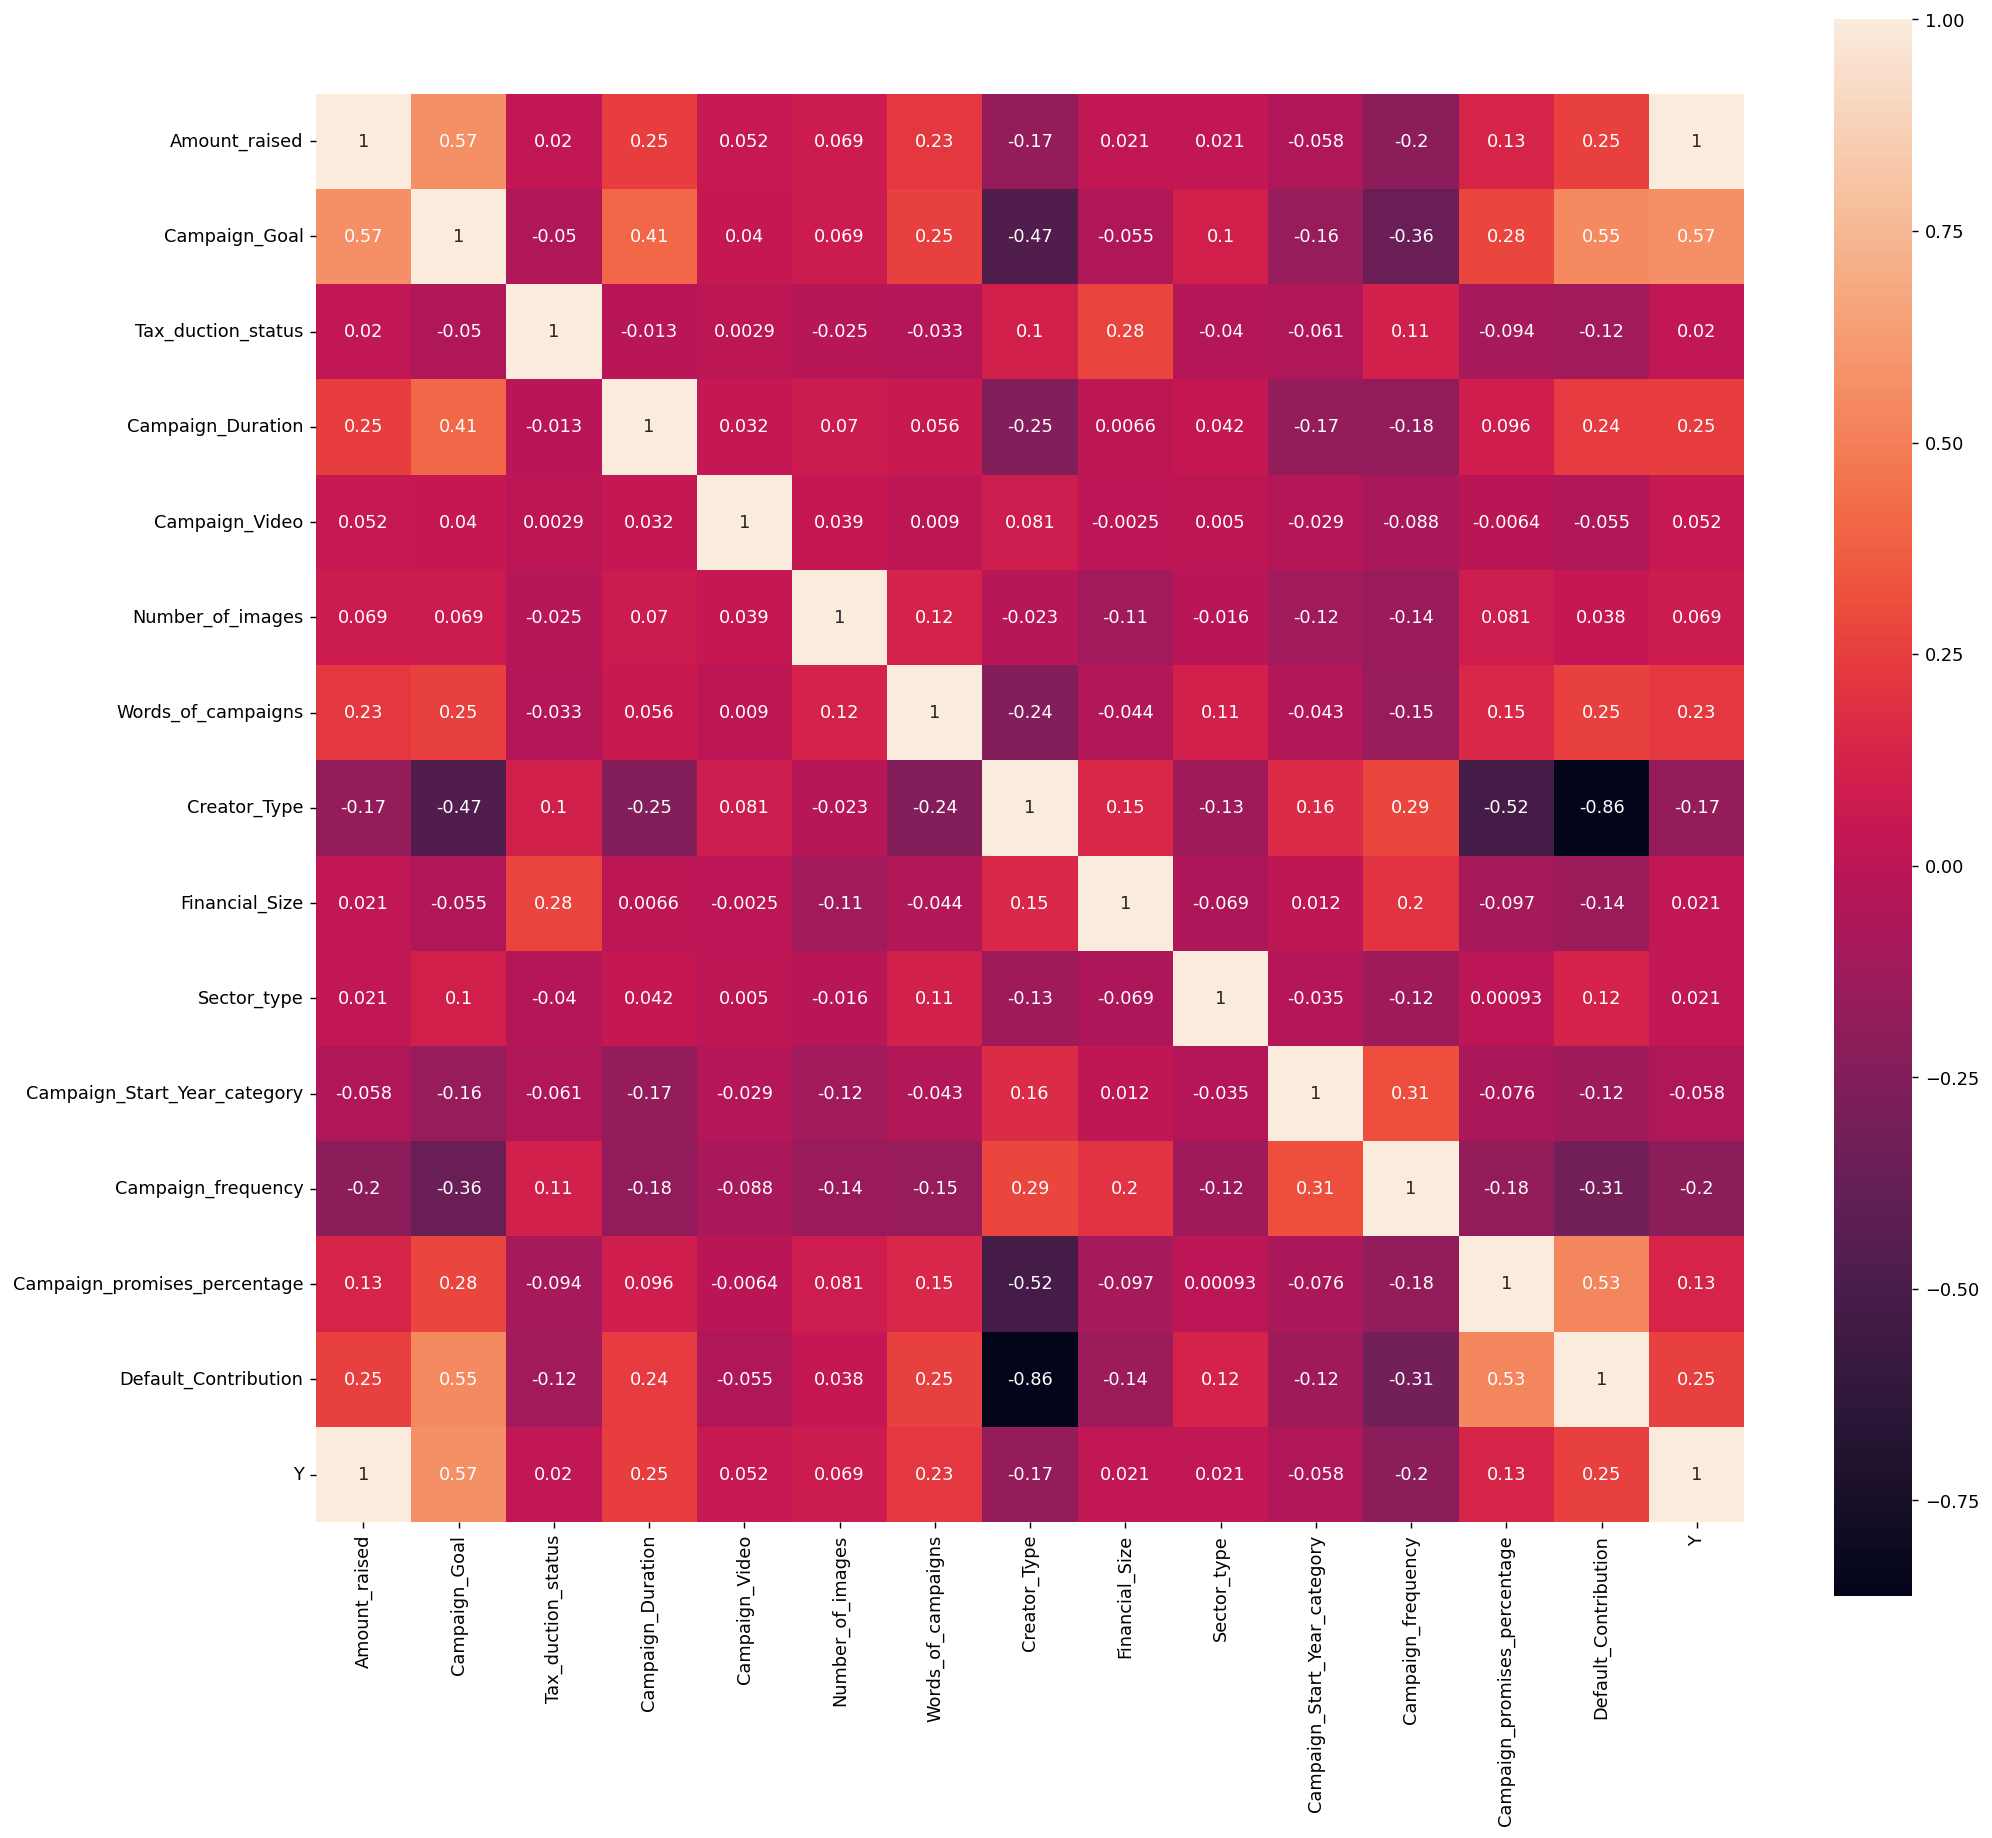

In [1193]:
# Numeric_features Store the following variables that need to draw correlations
numeric_features1 = ['Amount_raised', 'Campaign_Goal', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                     "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category", "Campaign_frequency",
                     "Campaign_promises_percentage", "Default_Contribution"]

# Correlation analysis
price_numeric = extract_data[numeric_features1]
correlation = extract_data.corr()
y_train = extract_data['Amount_raised']
corr = plt.subplots(figsize = (18,16), dpi=128)
corr= sns.heatmap(price_numeric.assign(Y=y_train).corr(method='spearman'), annot=True,square=True)

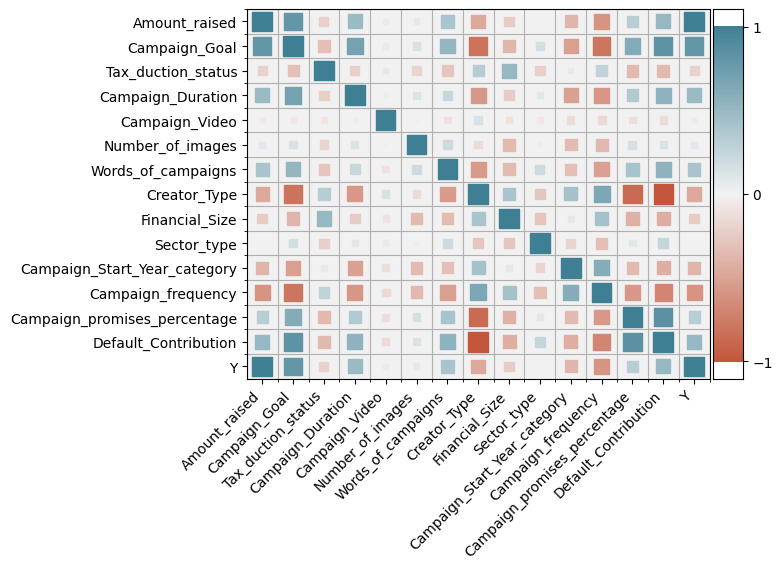

In [1194]:
# pip install heatmapz

from heatmap import heatmap, corrplot
corrplot(price_numeric.assign(Y=y_train).corr(method='spearman').corr(), size_scale=200)

Do a scatter plot, using IV with a DV 

Scatter plot 1
Amount_raised + Campaign Promise

Scatter plot 2
Amount_raised + Campaign Promise

Scatter plot 3
Number of Distinct_Donors   + Campaign Promise

Scatter plot 4 
Number of Distinct_Donors  + Campaign Promise

In [1195]:
'''
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(222)
plt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(223)
plt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.subplot(224)
plt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

plt.show()
'''

'\nplt.figure(figsize=(15,15))\n\nplt.subplot(221)\nplt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(222)\nplt.scatter(extract_data["Distinct_Donors"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(223)\nplt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.subplot(224)\nplt.scatter(extract_data["Amount_raised"], extract_data["Campaign Promise"])\nplt.xlabel(\'Sepal Length\'); plt.ylabel(\'Sepal Width\')\n\nplt.show()\n'

<font face = "Time New Roman" size = 6>  Historgram 

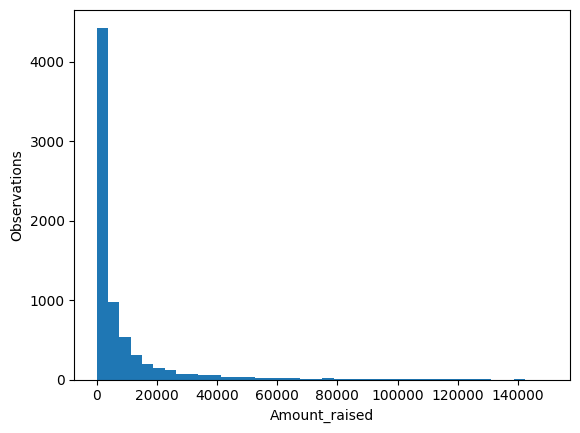

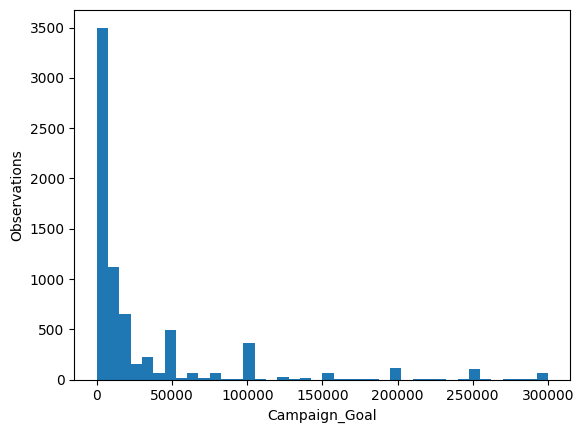

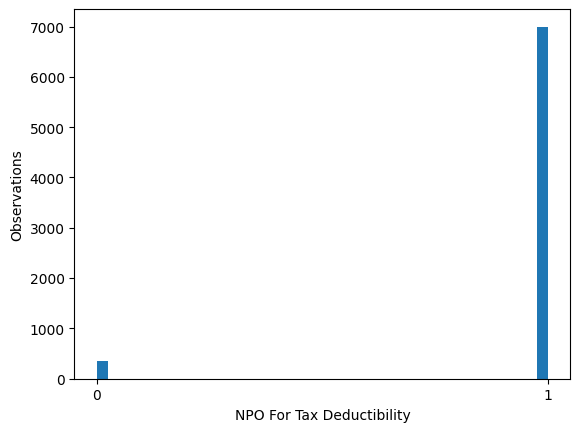

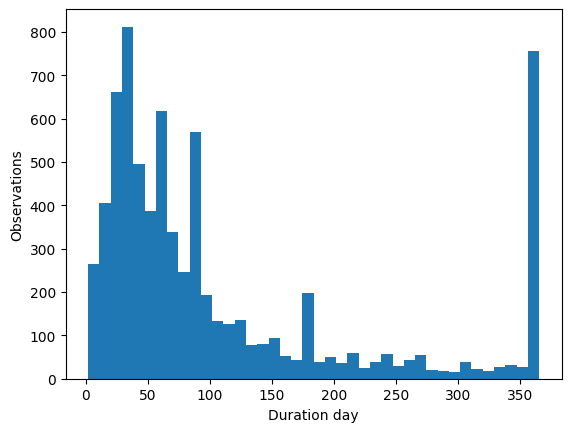

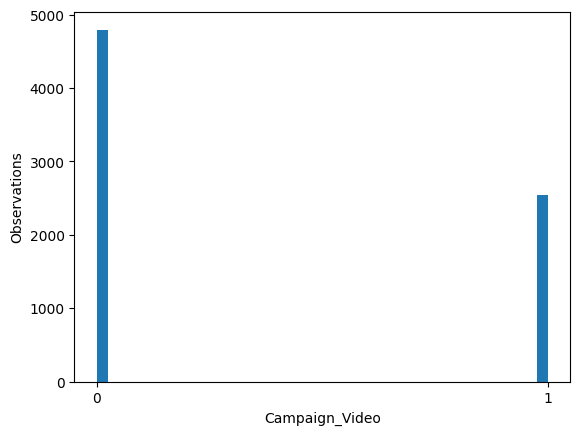

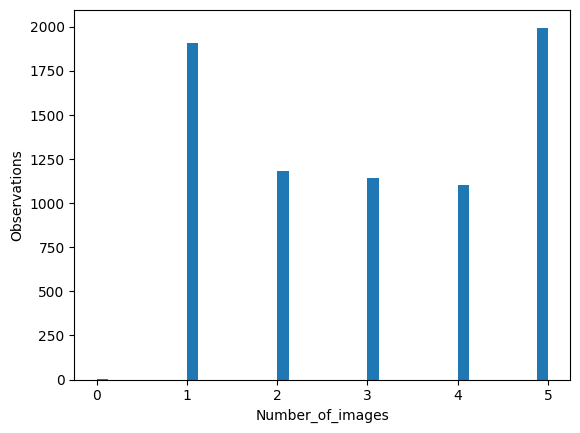

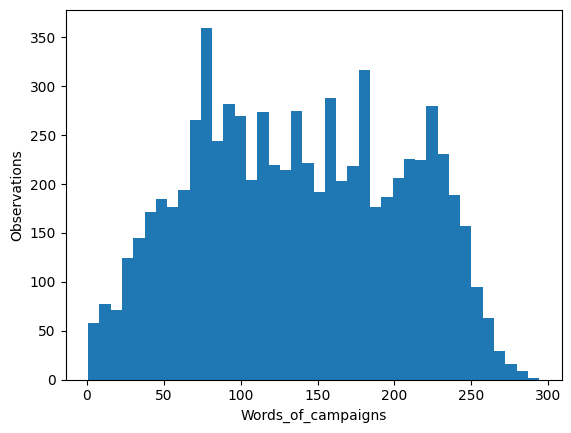

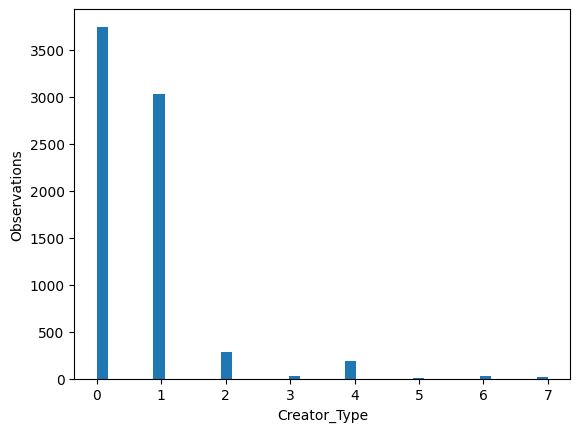

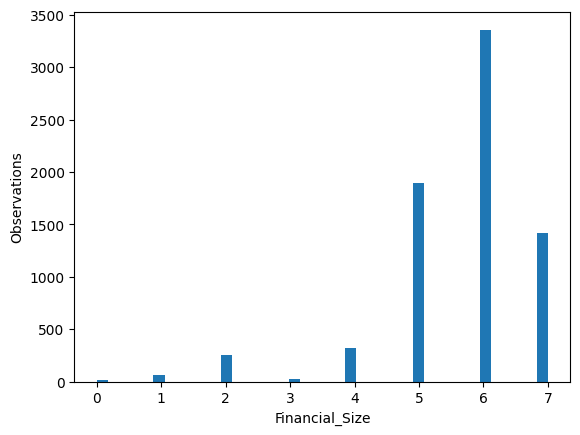

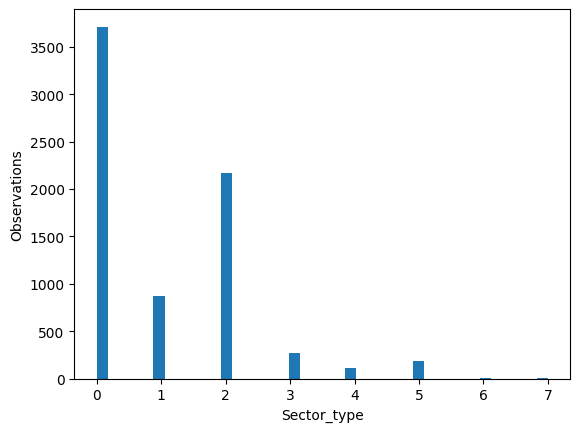

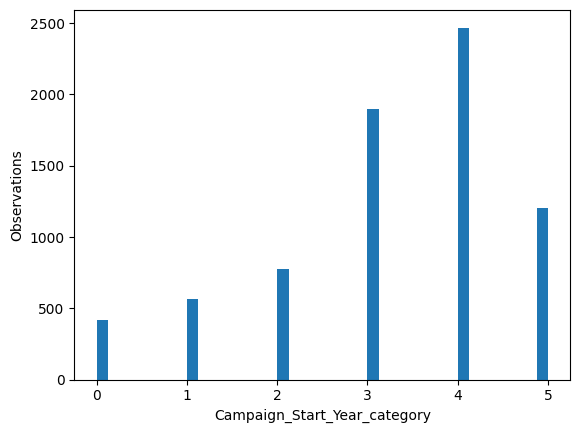

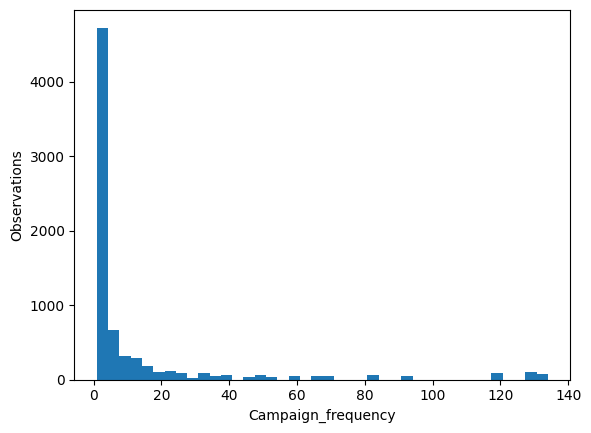

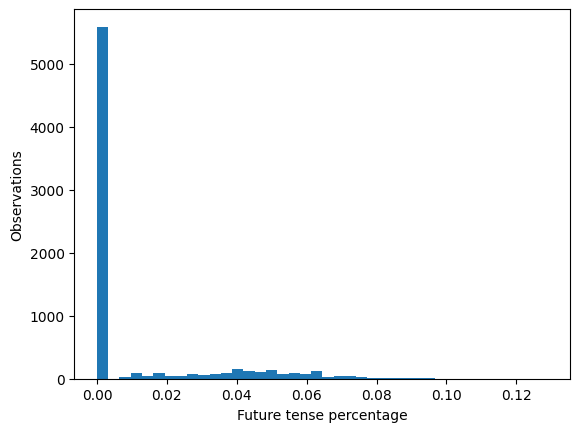

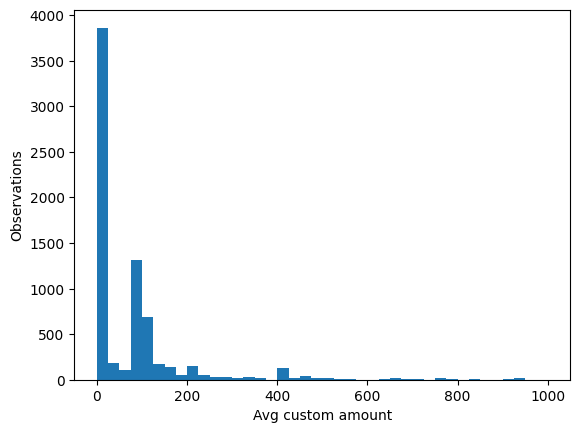

In [1196]:

#plt.figure(figsize=(20,20))
#plt.subplot(441)

'''
for i in numeric_features1:
    plt.hist(extract_data[i], bins=40)
    plt.xlabel(str(i)); plt.ylabel('Observations')
    plt.show()
'''
plt.hist(extract_data['Amount_raised'], bins=40, range=(0,150000))
plt.xlabel('Amount_raised'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign_Goal'], bins=40, range=(0,300000))
plt.xlabel('Campaign_Goal'); plt.ylabel('Observations')
plt.show()

#plt.subplot(443)
plt.hist(extract_data['Tax_duction_status'], bins=40)
plt.xlabel('NPO For Tax Deductibility'); plt.ylabel('Observations')
x_major_locator=MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()
#plt.subplot(444)
plt.hist(extract_data['Campaign_Duration'], bins=40)
plt.xlabel('Duration day'); plt.ylabel('Observations')
plt.show()
#plt.subplot(445)
plt.hist(extract_data['Campaign_Video'], bins=40)
plt.xlabel('Campaign_Video'); plt.ylabel('Observations')
x_major_locator=MultipleLocator(1)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

#plt.subplot(446)
plt.hist(extract_data['Number_of_images'], bins=40)
plt.xlabel('Number_of_images'); plt.ylabel('Observations')
plt.show()

#plt.subplot(447)
plt.hist(extract_data['Words_of_campaigns'], bins=40)
plt.xlabel('Words_of_campaigns'); plt.ylabel('Observations')
plt.show()


#plt.subplot(4,4,10)
plt.hist(extract_data['Creator_Type'], bins=40)
plt.xlabel('Creator_Type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,10)
plt.hist(extract_data['Financial_Size'], bins=40)
plt.xlabel('Financial_Size'); plt.ylabel('Observations')
plt.show()


#plt.subplot(4,4,10)
plt.hist(extract_data['Sector_type'], bins=40)
plt.xlabel('Sector_type'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,11)
plt.hist(extract_data['Campaign_Start_Year_category'], bins=40)
plt.xlabel('Campaign_Start_Year_category'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,12)
plt.hist(extract_data['Campaign_frequency'], bins=40)
plt.xlabel('Campaign_frequency'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,13)
plt.hist(extract_data['Campaign_promises_percentage'], bins=40)
plt.xlabel('Future tense percentage'); plt.ylabel('Observations')
plt.show()

#plt.subplot(4,4,14)
plt.hist(extract_data['Default_Contribution'], bins=40, range=(0,1000))
plt.xlabel('Avg custom amount'); plt.ylabel('Observations')
plt.show()



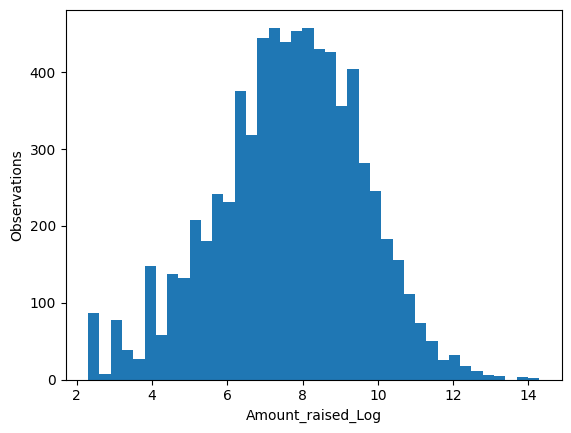

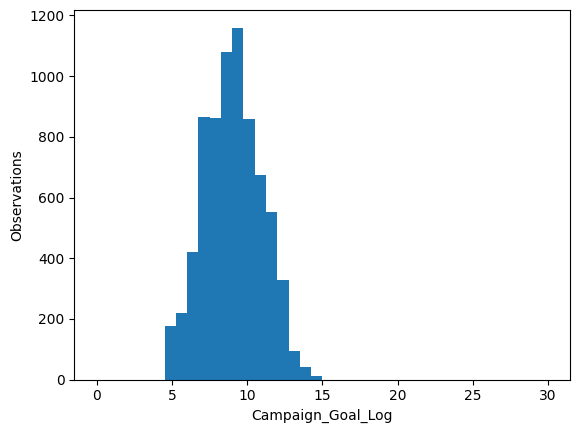

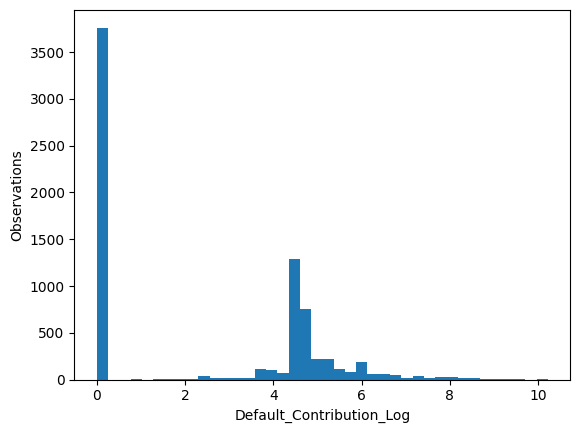

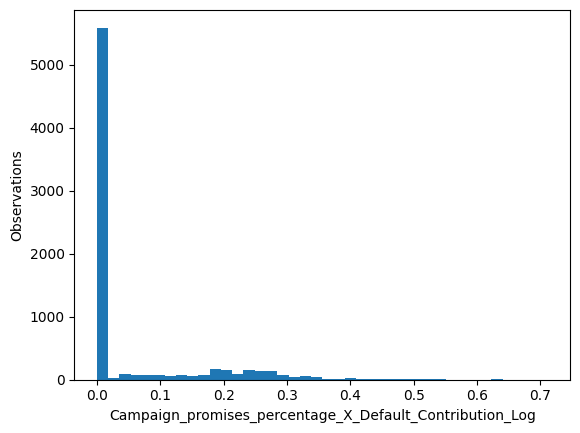

In [1197]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Amount_raised_Log'], bins=40)
plt.xlabel('Amount_raised_Log'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Campaign_Goal_Log'], bins=40, range=(0,30))
plt.xlabel('Campaign_Goal_Log'); plt.ylabel('Observations')
plt.show()

#plt.subplot(445)
plt.hist(extract_data['Default_Contribution_Log'], bins=40)
plt.xlabel('Default_Contribution_Log'); plt.ylabel('Observations')
plt.show()


#plt.subplot(449)
plt.hist(extract_data['Campaign_promises_percentage_X_Default_Contribution_Log'], bins=40)
plt.xlabel('Campaign_promises_percentage_X_Default_Contribution_Log'); plt.ylabel('Observations')
plt.show()


<font size =6 face = 'time new roman'> Variance inflation factor (Two methods to test make sure they are right)</font>

In [1198]:
'''
Clean_variables = ['Amount_raised','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]
for item in Clean_variables:
     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)
     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr
     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)
     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)
     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')
'''

"\nClean_variables = ['Amount_raised','Campaign_Goal', 'Description_Campaign_polarity','Description_Campaign_subjectivity' ]\nfor item in Clean_variables:\n     iqr = extract_data[item].quantile(0.9) - extract_data[item].quantile(0.1)\n     q_abnormal_L = extract_data[item] < extract_data[item].quantile(0.1) - 1.5  iqr\n     q_abnormal_U = extract_data[item] > extract_data[item].quantile(0.9) + 1.5  iqr\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.1) - 1.5  iqr> extract_data[item]].index)\n     extract_data = extract_data.drop(extract_data[extract_data[item].quantile(0.9) + 1.5  iqr< extract_data[item]].index)\n     print(item + '中有' + str(q_abnormal_L.sum() + q_abnormal_U.sum()) + '个异常值')\n"

<font face = "Time New Roman" size = 6> Modeling verfication</font>

 <font face = "Time New Roman" size = 5> Variance, Average, Max, Min, Median calculation</font>

In [1199]:
'''
i = 0
plt.figure(figsize=(13, 14))
plt.xticks([])
for title in numeric_features1:
    plt.subplot(4,3,i+1)
    plt.title(title)
    sns.kdeplot(extract_data[title], shade=True) 
    plt.xlabel(" ") 
    i += 1
'''
#plt.hist(extract_data['Campaign_Goal'], bins=80, histtype="stepfilled", alpha=.8)

'\ni = 0\nplt.figure(figsize=(13, 14))\nplt.xticks([])\nfor title in numeric_features1:\n    plt.subplot(4,3,i+1)\n    plt.title(title)\n    sns.kdeplot(extract_data[title], shade=True) \n    plt.xlabel(" ") \n    i += 1\n'

In [1200]:

s = extract_data['Amount_raised']
print(s.skew())
print(s.kurt())

18.76533114511192
515.0851788073364


<font face = "Time New Roman" size = 5> To see how log Actual funds raised changes for  different levels of future tense percentage and log avg custom amount

In [1201]:
extract_data['Campaign_promises_percentage_Log_level'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_promises_percentage'] < 0.08043 and extract_data.loc[index,'Campaign_promises_percentage'] > 0:
        extract_data.loc[index,'Campaign_promises_percentage_Log_level'] = 0.04
    if extract_data.loc[index,'Campaign_promises_percentage'] >= 0.08043:
        extract_data.loc[index,'Campaign_promises_percentage_Log_level'] = 0.1

In [1202]:
extract_data['Campaign_promises_percentage_Log'] = np.log(extract_data['Campaign_promises_percentage'] + 1)
extract_data['Default_Contribution_Log'] = np.log(extract_data['Default_Contribution'] + 1)
extract_data['Campaign_promises_percentage_Log_X_Default_Contribution_Log'] = extract_data['Campaign_promises_percentage_Log'] * extract_data['Default_Contribution_Log']


In [1203]:
(extract_data['Campaign_promises_percentage_Log'].value_counts())

0.000000    5594
0.048790      76
0.059898      55
0.038221      47
0.054067      43
0.068993      34
0.042560      25
0.040822      23
0.028573      20
0.044060      19
0.035718      18
0.059719      18
0.060625      17
0.018019      17
0.058269      16
0.057820      16
0.047628      16
0.045462      16
0.041243      15
0.044452      15
0.057158      15
0.035091      15
0.033902      15
0.046520      14
0.040410      13
0.061558      13
0.039221      13
0.025975      13
0.054808      12
0.043803      12
0.016807      12
0.031749      12
0.065597      12
0.046957      11
0.017094      11
0.065958      11
0.009756      11
0.036368      11
0.064539      10
0.073025      10
0.044951      10
0.044851       9
0.032261       9
0.061369       9
0.053489       9
0.029853       9
0.053110       9
0.040005       9
0.066691       9
0.038466       9
0.010152       9
0.021506       9
0.053346       9
0.062914       8
0.016261       8
0.058496       8
0.050010       8
0.051293       8
0.030772      

In [1204]:
numeric_features2 = ['Amount_raised_Log', 'Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",
                    'Campaign_promises_percentage_Log_X_Default_Contribution_Log']

In [1205]:
for title in numeric_features2:
    extract_data[title] = pd.to_numeric( extract_data[title])
    print( title, "Median:",np.mean(extract_data[title]))
    print( title, "Std:",np.std(extract_data[title]))
    
    print( title, "skew:" ,extract_data[title].skew())
    print( title, "kurt:" ,extract_data[title].kurt())
    
    print( title, "Min:" ,np.min(extract_data[title]))
    print( title, "Max:" ,np.max(extract_data[title]))

Amount_raised_Log Median: 7.629439344937267
Amount_raised_Log Std: 1.9559319987280748
Amount_raised_Log skew: -0.2695885136210425
Amount_raised_Log kurt: 0.026774017772850822
Amount_raised_Log Min: 2.302585092994046
Amount_raised_Log Max: 14.287354991888984
Campaign_Goal_Log Median: 8.96277462340678
Campaign_Goal_Log Std: 1.943153656723777
Campaign_Goal_Log skew: 0.042169814867144516
Campaign_Goal_Log kurt: -0.4164323123458229
Campaign_Goal_Log Min: 4.605170185988092
Campaign_Goal_Log Max: 14.508657738524219
Tax_duction_status Median: 0.953133514986376
Tax_duction_status Std: 0.21135282727252958
Tax_duction_status skew: -4.288810774282283
Tax_duction_status kurt: 16.398366003129844
Tax_duction_status Min: 0
Tax_duction_status Max: 1
Campaign_Duration Median: 111.71362397820164
Campaign_Duration Std: 109.63738724026686
Campaign_Duration skew: 1.3605804712058975
Campaign_Duration kurt: 0.5329380034615174
Campaign_Duration Min: 2
Campaign_Duration Max: 365
Campaign_Video Median: 0.3463215

In [1206]:
extract_data['Campaign_promises_percentage_Log'].unique()

array([0.01197619, 0.        , 0.0618754 , 0.08535985, 0.03704127,
       0.02298952, 0.09763847, 0.05635294, 0.02817088, 0.0529224 ,
       0.05236799, 0.05182507, 0.01015237, 0.05406722, 0.0104713 ,
       0.04301739, 0.04879016, 0.01307208, 0.08894749, 0.05971923,
       0.08701138, 0.06538276, 0.04762805, 0.0419642 , 0.05001042,
       0.04380262, 0.05195974, 0.05942342, 0.04959694, 0.06169357,
       0.05781957, 0.02739897, 0.03509132, 0.04396312, 0.02222314,
       0.02424361, 0.06453852, 0.02666825, 0.02197891, 0.02643326,
       0.00975617, 0.02777956, 0.01129956, 0.01834914, 0.03077166,
       0.06062462, 0.03953084, 0.05588046, 0.02871011, 0.02597549,
       0.0588405 , 0.0416727 , 0.03984591, 0.02898754, 0.01273903,
       0.03571808, 0.01418463, 0.06899287, 0.07755823, 0.0129034 ,
       0.05798726, 0.04652002, 0.05129329, 0.04598511, 0.05918887,
       0.02985296, 0.05849621, 0.04255961, 0.04445176, 0.07729167,
       0.04740224, 0.05715841, 0.05455898, 0.02715099, 0.01769

In [1207]:
np.mean(extract_data['Campaign_promises_percentage_Log'])

0.010170470208412549

In [1208]:
np.mean(extract_data['Campaign_promises_percentage_Log'].unique())

0.039563003250765096

In [1209]:
np.max(extract_data['Campaign_promises_percentage_Log'])

0.12136085700426734

In [1210]:
(0.03956+0.1213)/2

0.08043

In [1211]:
interaction_data1 = extract_data[['Campaign_promises_percentage_Log', 'Default_Contribution_Log', 'Amount_raised_Log']]

In [1212]:
extract_data.shape

(7340, 115)

<font face = "Time New Roman" size = 5> Interaction variables classification

In [1213]:
num = 0
for index, row in interaction_data1.iterrows():
    if interaction_data1.loc[index,'Campaign_promises_percentage_Log'] != 0:
        if interaction_data1.loc[index,'Campaign_promises_percentage_Log'] < 0.038 or interaction_data1.loc[index,'Campaign_promises_percentage_Log'] > 0.039:
            if interaction_data1.loc[index,'Campaign_promises_percentage_Log'] < 0.059:
                interaction_data1.drop(index, inplace=True)

In [1214]:
for index, row in interaction_data1.iterrows():
    if interaction_data1.loc[index,'Campaign_promises_percentage_Log'] >= 0.038 and interaction_data1.loc[index,'Campaign_promises_percentage_Log'] <= 0.039:
        interaction_data1.loc[index,'Campaign_promises_percentage_Log'] = 0.038
    if interaction_data1.loc[index,'Campaign_promises_percentage_Log'] >= 0.055 :
        interaction_data1.loc[index,'Campaign_promises_percentage_Log'] = 0.055

In [1215]:
extract_data['Campaign_promises_percentage_Log'].unique()

array([0.01197619, 0.        , 0.0618754 , 0.08535985, 0.03704127,
       0.02298952, 0.09763847, 0.05635294, 0.02817088, 0.0529224 ,
       0.05236799, 0.05182507, 0.01015237, 0.05406722, 0.0104713 ,
       0.04301739, 0.04879016, 0.01307208, 0.08894749, 0.05971923,
       0.08701138, 0.06538276, 0.04762805, 0.0419642 , 0.05001042,
       0.04380262, 0.05195974, 0.05942342, 0.04959694, 0.06169357,
       0.05781957, 0.02739897, 0.03509132, 0.04396312, 0.02222314,
       0.02424361, 0.06453852, 0.02666825, 0.02197891, 0.02643326,
       0.00975617, 0.02777956, 0.01129956, 0.01834914, 0.03077166,
       0.06062462, 0.03953084, 0.05588046, 0.02871011, 0.02597549,
       0.0588405 , 0.0416727 , 0.03984591, 0.02898754, 0.01273903,
       0.03571808, 0.01418463, 0.06899287, 0.07755823, 0.0129034 ,
       0.05798726, 0.04652002, 0.05129329, 0.04598511, 0.05918887,
       0.02985296, 0.05849621, 0.04255961, 0.04445176, 0.07729167,
       0.04740224, 0.05715841, 0.05455898, 0.02715099, 0.01769

# <font face = "Time New Roman" size = 8> 6. Packaged codes

In [1216]:
def vif(df, col_i):
	from statsmodels.formula.api import ols
	cols = list(df.columns)
	cols.remove(col_i)
	cols_noti = cols
	formula = col_i + '~' + '+'.join(cols_noti)
	r2 = ols(formula, df).fit().rsquared
	return 1.0 / (1.0 - r2)

In [1217]:
def press_statistic(y_true, y_pred, xs):
    """
    Calculation of the `Press Statistics <https://www.otexts.org/1580>`_
    """
    res = y_pred - y_true
    hat = xs.dot(np.linalg.pinv(xs))
    den = (1 - np.diagonal(hat))
    sqr = np.square(res/den)
    return sqr.sum()

def predicted_r2(y_true, y_pred, xs):
    """
    Calculation of the `Predicted R-squared <https://rpubs.com/RatherBit/102428>`_
    """
    press = press_statistic(y_true=y_true,
                            y_pred=y_pred,
                            xs=xs
    )

    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - press / sst
 
def r2(y_true, y_pred):
    """
    Calculation of the unadjusted r-squared, goodness of fit metric
    """
    sse  = np.square( y_pred - y_true ).sum()
    sst  = np.square( y_true - y_true.mean() ).sum()
    return 1 - sse/sst

    

In [1218]:
def Linear_Regression(X, Y):
    # with statsmodels
    # X = sm.add_constant(X) # adding a constant
    model1 = sm.OLS(Y, X).fit()
    results1 = model1.summary()
    #predicts = model1._results
    print(results1)
    return model1

In [1219]:
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
def Interaction_plot(DV, interaction_variable1, interaction_variable2_catergial, Dataset):
    Y = Dataset[[DV]]
    X = Dataset[[interaction_variable1, interaction_variable2_catergial]]
    Reg7 = ols(formula = "%s ~ %s  * %s " % (DV, interaction_variable1, interaction_variable2_catergial), data = extract_data).fit()
    fig = interaction_plot(Dataset[interaction_variable1], Dataset[interaction_variable2_catergial], Reg7.fittedvalues,
                       ylabel= DV, xlabel = interaction_variable1)
    plt.show()

In [1220]:
from scipy.stats import gaussian_kde
def  residule_plot(x, y, data_set, remove_zero = 0):  
    X = np.array(data_set[x])
    Y = np.array(y)
    # remove 0 line
    if remove_zero == 1:
        Y = np.delete(Y, X == 0)
        X = np.delete(X, X == 0)
    XY = np.vstack([X, Y])
    Z = gaussian_kde(XY)(XY)
    idx = Z.argsort()
    X = X[idx]
    Y = Y[idx]
    Z = Z[idx]

    plt.figure(figsize=(10,10))
    plt.scatter(X, Y, marker=',', c=Z, s=15, cmap='Blues' )
    #plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
    plt.axhline(y = 0, color='b', linestyle='--', lw=0.5)
    plt.xlabel(x)
    #plt.xlim((-0.5, 11))
    plt.ylabel("Residual")
    #plt.savefig('%s.png' % x, dpi=1600) # save as png or not
    plt.show()

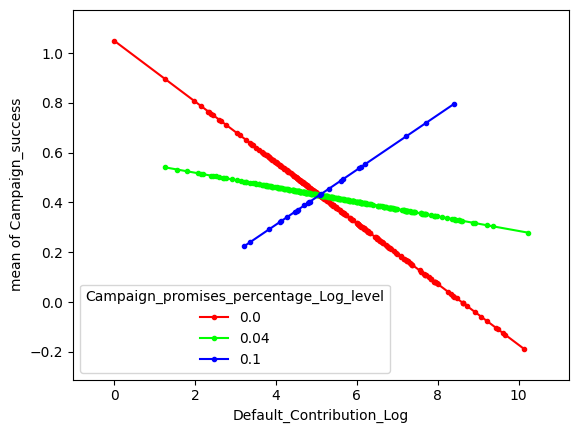

In [1221]:
DV = 'Campaign_success'
interaction_variable1 = 'Default_Contribution_Log'
interaction_variable2_catergial = 'Campaign_promises_percentage_Log_level'

Interaction_plot(DV, interaction_variable1, interaction_variable2_catergial, extract_data)

In [1222]:
Model1_variables = ['Campaign_promises_percentage', 'Default_Contribution_Log']
import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     220.8
Date:                Sat, 24 Jun 2023   Prob (F-statistic):           7.83e-94
Time:                        15:40:37   Log-Likelihood:                -15125.
No. Observations:                7340   AIC:                         3.026e+04
Df Residuals:                    7337   BIC:                         3.028e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<font face = "Time New Roman" size = 6 color=red> Delete unused columns

In [1223]:
unused_columns = ['Donation_per_donor', 'Campaign_Start_Day','Campaign_Start_Month',
       'Campaign_End_Day', 'Campaign_End_Month', 'Campaign_End_Year',
       'Campaign_Start', 'Campaign_End', 
       'Num_desc_NPO',
       'Campaign_Duration_Log',
       'Campaign_promises_X_Campaign_frequency',
       'Campaign_frequency_X_Default_Contribution_Log', 
       'Log_Org_causes',
       'Campaign_promises_percentage_X_Campaign_frequency',
       'Campaign_promises_percentage_X_Default_Contribution',
       'Amount_raised_Log_round']
extract_data = extract_data.drop(unused_columns, axis = 1)
extract_data.to_csv("24-Jun-dataset.csv")

# <font face = "Time New Roman" size = 8> 7. Linear regression model

<font face = "Time New Roman" size = 5> The Linear regression of selected variables</font> <font face = "Time New Roman" size = 5 color =red> Model 1</font>

In [1224]:
extract_data['Org_causes'].value_counts()

4    5714
3     906
1     439
2     281
Name: Org_causes, dtype: int64

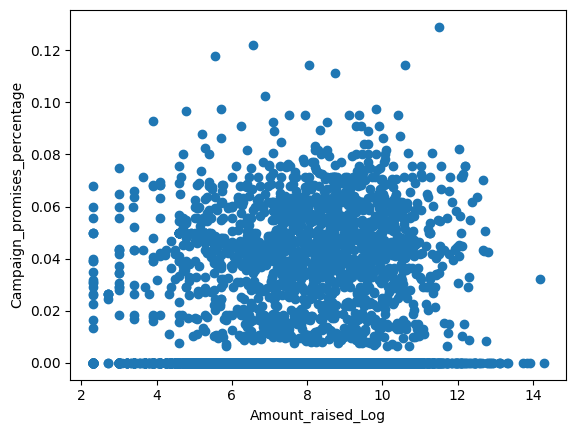

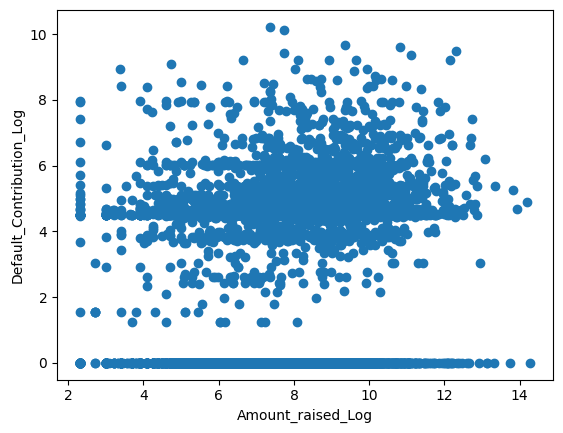

In [1225]:
plt.scatter(extract_data["Amount_raised_Log"], extract_data["Campaign_promises_percentage"])
#plt.xlim(0,30000)
#plt.ylim(0,30000)
plt.xlabel('Amount_raised_Log'); plt.ylabel('Campaign_promises_percentage')
plt.show()

plt.scatter(extract_data["Amount_raised_Log"], extract_data["Default_Contribution_Log"])
plt.xlabel('Amount_raised_Log'); plt.ylabel('Default_Contribution_Log')
plt.show()

In [1226]:
extract_data["Campaign_Start_Year"] = pd.to_numeric(extract_data["Campaign_Start_Year"])
extract_data["Creator_Type"] = pd.to_numeric(extract_data["Creator_Type"])

In [1227]:
# extract_data.to_csv('4-Jun-dataset.csv')

# <font face = "Time New Roman" size = 6>  Base model

In [1228]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     346.3
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:40:38   Log-Likelihood:                -13803.
No. Observations:                7340   AIC:                         2.763e+04
Df Residuals:                    7328   BIC:                         2.771e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# <font face = "Time New Roman" size = 6>  Model 2 = Base model + Future tense percentage + Default_Contribution_Log

In [1229]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Campaign_promises_percentage", "Default_Contribution_Log"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)

                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:40:38   Log-Likelihood:                -13790.
No. Observations:                7340   AIC:                         2.761e+04
Df Residuals:                    7326   BIC:                         2.770e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

# <font face = "Time New Roman" size = 6>  Model 3 = Model 2 + Campaign_promises_percentage_X_Default_Contribution_Log

In [1230]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Campaign_promises_percentage", "Default_Contribution_Log",
                    'Campaign_promises_percentage_X_Default_Contribution_Log']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)


                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     277.8
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:40:38   Log-Likelihood:                -13776.
No. Observations:                7340   AIC:                         2.758e+04
Df Residuals:                    7325   BIC:                         2.769e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

# <font face = "Time New Roman" size = 6>  Robustness test 1

In [1231]:
'''
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    'Campaign_frequency' , "Campaign_promises_percentage", "Default_Contribution_Log",
                    'Campaign_promises_percentage_X_Default_Contribution_Log']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Distinct_Donors_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
'''

'\nModel1_variables = [\'Campaign_Goal_Log\', \'Tax_duction_status\', \'Campaign_Duration\',\n                     \'Campaign_Video\',  \'Number_of_images\',\'Words_of_campaigns\',\n                    "Creator_Type", \'Financial_Size\', "Sector_type", "Campaign_Start_Year_category",\n                    \'Campaign_frequency\' , "Campaign_promises_percentage", "Default_Contribution_Log",\n                    \'Campaign_promises_percentage_X_Default_Contribution_Log\']\n\nimport statsmodels.formula.api as smf\nX = extract_data[Model1_variables] \nY = extract_data[\'Distinct_Donors_Log\']\n# with statsmodels\nX = sm.add_constant(X) # adding a constant\nmodel1 = sm.OLS(Y, X).fit()\n\nresults1 = model1.summary()\n#predicts = model1._results\nprint(results1)\n'

<font face = "Time New Roman" size = 6>  Calculate Residual Standard Error

In [1232]:
# Residual Standard Error of the model
np.sqrt(model1.scale)

1.5823701616420498

<font face = "Time New Roman" size = 6> Calculate predicted_r2

In [1233]:
IV1 = extract_data['Campaign_promises_percentage']
len(model1.resid)

7340

<font face = "Time New Roman" size = 6> Based on last model, get the ourliers

In [1234]:

#abnormal detection
outliers = model1.get_influence()
#High leverage points
leverage = outliers.hat_matrix_diag
#DFFITS value
dffits = outliers.dffits[0]
#standard residue
resid_stu = outliers.resid_studentized_external
#Cook distance
cook = outliers.cooks_distance[0]
#Merge all the abnormal values
contat1 = pd.concat([pd.Series(leverage, name='leverage'), pd.Series(dffits, name='dffits'), pd.Series(resid_stu, name='resid_stu'), pd.Series(cook, name='cook')], axis=1)
#reset train data index
extract_data.index = range(extract_data.shape[0])
#Merge abnormal values with original data
profit_outliers = pd.concat([extract_data, contat1], axis=1)
#set display numbers
#pd.set_option('display.width', 200)
#set display columns
pd.set_option('display.max_columns',None)
#set display rows
pd.set_option('display.max_rows', None)
#print(profit_outliers)

#print(profit_outliers[np.abs(profit_outliers.resid_stu)>4])
#calculate the percentage of abnomal
#outliers_ratio = sum(np.where( (np.abs(profit_outliers.resid_stu)>2), 1, 0)) / profit_outliers.shape[0]
#print(outliers_ratio)


In [1235]:
print("Number of outliers:" + str(profit_outliers[np.abs(profit_outliers.resid_stu)>2].shape[0]))
print("Rows numbers before removing outliers:" + str(extract_data.shape[0]))
out_liers_Campaign_Id = profit_outliers[np.abs(profit_outliers.resid_stu)>2]['Campaign_Id'].to_list()
out_liers_Campaign_Id = profit_outliers[np.abs(profit_outliers.resid_stu)>2]['Campaign_Id'].to_list()
num1 = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index, 'Campaign_Id'] in out_liers_Campaign_Id:
        extract_data.drop(index, inplace=True)
        num1 += 1
print("Total delete out liers numbers :", num1)  
print("Rows numbers after removing outliers:" + str(extract_data.shape[0]))

Number of outliers:368
Rows numbers before removing outliers:7340
Total delete out liers numbers : 368
Rows numbers after removing outliers:6972


<font face = "Time New Roman" size = 6> Already removed outliers, left 6972

In [1236]:
numeric_features2 = ['Amount_raised_Log', 'Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",
                    'Campaign_promises_percentage_Log_X_Default_Contribution_Log']

<font face = "Time New Roman" size = 6> VIF test 1

In [1237]:
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))

Amount_raised_Log 	 1.9593106446166808
Campaign_Goal_Log 	 2.624003971179146
Tax_duction_status 	 1.2983320784865426
Campaign_Duration 	 1.2314179548281596
Campaign_Video 	 1.0400803122780522
Number_of_images 	 1.0792448800410415
Words_of_campaigns 	 1.1383598534155797
Creator_Type 	 1.851967070342675
Financial_Size 	 1.3432048759464552
Sector_type 	 1.0437708143972735
Campaign_Start_Year_category 	 1.131199489488718
Campaign_frequency 	 1.3942757589848307
Campaign_promises_percentage_Log 	 25.609168145916783
Default_Contribution_Log 	 2.9977379861637385
Campaign_promises_percentage_Log_X_Default_Contribution_Log 	 26.500138223471204


<font face = "Time New Roman" size = 6> VIF test 2

In [1238]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import numpy as np
test_data = extract_data[numeric_features2[1:]]
x = add_constant(test_data)
# 当VIF<10,说明不存在多重共线性；当10<=VIF<100,存在较强的多重共线性，当VIF>=100,存在严重多重共线性
vif_res = [variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
j = 0
for i in numeric_features2:
	print(i, "\t", vif_res[j])
	j += 1

Amount_raised_Log 	 80.23518076228166
Campaign_Goal_Log 	 1.76015777952216
Tax_duction_status 	 1.2977996622549353
Campaign_Duration 	 1.221759481398104
Campaign_Video 	 1.0400478032426637
Number_of_images 	 1.0789683682930369
Words_of_campaigns 	 1.1195554309368771
Creator_Type 	 1.8489910740399722
Financial_Size 	 1.3365594899149154
Sector_type 	 1.040111030772338
Campaign_Start_Year_category 	 1.1211425272389306
Campaign_frequency 	 1.3737971462680727
Campaign_promises_percentage_Log 	 25.523379186538488
Default_Contribution_Log 	 2.9635937877468845
Campaign_promises_percentage_Log_X_Default_Contribution_Log 	 26.373043435709295


<font face = "Time New Roman" size = 6> VIF test 3

In [1239]:
# When VIF<10, it means that there is no multicollinearity; 
# when 10<=VIF<100, there is strong multicollinearity; when VIF>=100, there is severe multicollinearity
tol = [1./variance_inflation_factor(x.values, x.columns.get_loc(i)) for i in x.columns]
j = 0
for i in numeric_features2:
	print(i, "\t", tol[j])
	j += 1

Amount_raised_Log 	 0.012463360716576055
Campaign_Goal_Log 	 0.5681308866932803
Tax_duction_status 	 0.7705349516446117
Campaign_Duration 	 0.8184917041574037
Campaign_Video 	 0.9614942667848512
Number_of_images 	 0.9268112294914007
Words_of_campaigns 	 0.8932116913256991
Creator_Type 	 0.5408354934970235
Financial_Size 	 0.7481896672355822
Sector_type 	 0.9614358183062884
Campaign_Start_Year_category 	 0.8919472553259827
Campaign_frequency 	 0.7279095044828892
Campaign_promises_percentage_Log 	 0.03917976505741916
Default_Contribution_Log 	 0.337428160409347
Campaign_promises_percentage_Log_X_Default_Contribution_Log 	 0.03791750475965139


<font face = "Time New Roman" size = 6> Add Log Avg custom amount level

In [1240]:
print(extract_data['Default_Contribution_Log'].min())
print(extract_data['Default_Contribution_Log'].max())
print(np.median(extract_data['Default_Contribution_Log']))
print(extract_data['Default_Contribution_Log'].mean())

0.0
10.130164852798476
0.0
2.3553805042430627


In [1241]:
extract_data['Default_Contribution_Log_level'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Default_Contribution_Log'] < 5.35 and extract_data.loc[index,'Default_Contribution_Log'] > 2.35:
        extract_data.loc[index,'Default_Contribution_Log_level'] = 2.35
    if extract_data.loc[index,'Default_Contribution_Log'] >= 5.35:
        extract_data.loc[index,'Default_Contribution_Log_level'] = 5.35

    if extract_data.loc[index,'Default_Contribution_Log'] <= 2.35:
        extract_data.loc[index,'Default_Contribution_Log_level'] = 0.35

In [1242]:
extract_data['Default_Contribution_Log_level'].unique()

array([2.35, 0.35, 5.35])

<font face = "Time New Roman" size = 6> Another Base model

In [1243]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     590.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:41:17   Log-Likelihood:                -11592.
No. Observations:                6972   AIC:                         2.321e+04
Df Residuals:                    6960   BIC:                         2.329e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1244]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.63113465960979
Predicted R2 : 0.48068882472442764


In [1245]:
'''

test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))
    
'''

'\n\ntest_data = extract_data[numeric_features2]\nfor i in numeric_features2:\n\tprint(i, "\t", vif(df=test_data, col_i=i))\n    \n'

<font face = "Time New Roman" size = 6> Change future tense and custom amount into category variables

In [1246]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status', 'Campaign_frequency',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status', 'Amount_raised', 'Distinct_Donors', 'Campaign_Goal',
       'Campaign_Completion_Rate', 'Days_Left_for_Campaign',
       'Campaign_Start_Date', 'Campaign_End_Date', 'Tax_duction_status',
       'Campaign_Image1_Id', 'Campaign_Image2_Id', 'Campaign_Image3_Id',
       'Campaign_Image4_Id', 'Campaign_Image5_Id', 'Campaign_Video',
       'Impact_Message_1', 'Impact_Message_2', 'Impact_Message_3',
       'Impact_Message_4', 'Impact_Message_5', 'Custom_Amount_1',
       'Custom_Amount_2', 'Custom_Amount_3', 'Custom_Amount_4',
       'Description_of_Campaign', 'Description_of_NPO', 'Campaign_Title_y',
       'Org_Cause_Animal_Welfare', 'Org_Cause_Arts_&_Heritage',
       'Org_Cause_Children_&_Youth', 'Org_Cause_Community',
       'Org_Cause_Disability', 'Org_Cause_Education', 'Org

In [1247]:
extract_data['Campaign_promises_categoty'] = 0
extract_data['Custom_amount_categoty'] = 0
for index, row in extract_data.iterrows():
    if extract_data.loc[index,'Campaign_promises'] > 0:
        extract_data.loc[index,'Campaign_promises_categoty'] = 1
    if extract_data.loc[index,'Default_Contribution'] > 0:
        extract_data.loc[index,'Custom_amount_categoty'] = 1

<font face = "Time New Roman" size = 6> Another model 2

In [1248]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_categoty", "Custom_amount_categoty"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     510.7
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:41:18   Log-Likelihood:                -11554.
No. Observations:                6972   AIC:                         2.314e+04
Df Residuals:                    6958   BIC:                         2.323e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1249]:
'''
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))
'''	

'\ntest_data = extract_data[numeric_features2]\nfor i in numeric_features2:\n\tprint(i, "\t", vif(df=test_data, col_i=i))\n'

In [1250]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.6137221760814024
Predicted R2 : 0.48606785166163413


<font face = "Time New Roman" size = 8> Lastest Model 1 

In [1251]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.482
Method:                 Least Squares   F-statistic:                     590.2
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:41:19   Log-Likelihood:                -11592.
No. Observations:                6972   AIC:                         2.321e+04
Df Residuals:                    6960   BIC:                         2.329e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

<font face = "Time New Roman" size = 8> Model 1 robust test 1

In [1252]:

Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Distinct_Donors_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                             OLS Regression Results                            
Dep. Variable:     Distinct_Donors_Log   R-squared:                       0.336
Model:                             OLS   Adj. R-squared:                  0.335
Method:                  Least Squares   F-statistic:                     320.2
Date:                 Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                         15:41:19   Log-Likelihood:                -10882.
No. Observations:                 6972   AIC:                         2.179e+04
Df Residuals:                     6960   BIC:                         2.187e+04
Df Model:                           11                                         
Covariance Type:             nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const 

In [1253]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.3303573442351524
Predicted R2 : 0.3335809510365161


<font face = "Time New Roman" size = 8> Model 1 robust test 2

In [1254]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     82.64
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          2.95e-176
Time:                        15:41:19   Log-Likelihood:                -10645.
No. Observations:                6972   AIC:                         2.131e+04
Df Residuals:                    6960   BIC:                         2.140e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [1255]:
'''
test_data = extract_data[numeric_features2]
for i in numeric_features2:
	print(i, "\t", vif(df=test_data, col_i=i))
'''

'\ntest_data = extract_data[numeric_features2]\nfor i in numeric_features2:\n\tprint(i, "\t", vif(df=test_data, col_i=i))\n'

In [1256]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2431022080488225
Predicted R2 : 0.11200001557904404


In [1257]:
extract_data['Sqr_Campaign_promises_percentage'] = np.sqrt(extract_data['Campaign_promises_percentage'])

In [1258]:
extract_data['Campaign_promises_percentage_Log'] = np.log(extract_data['Campaign_promises_percentage'] + 1)
extract_data['Default_Contribution_Log'] = np.log(extract_data['Default_Contribution'] + 1)
extract_data['Campaign_promises_percentage_Log_X_Default_Contribution_Log'] = extract_data['Campaign_promises_percentage_Log'] * extract_data['Default_Contribution_Log']


In [1259]:
min(extract_data['Default_Contribution_Log'])

0.0

<font face = "Time New Roman" size = 8> Lastest Model2

In [1260]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log"]
X = extract_data[Model1_variables] 
#X = sm.add_constant(X) # adding a constant
Y = extract_data['Amount_raised_Log']
Model2 = Linear_Regression(X, Y)
y_true= Y
y_pred = Model2.predict(X)
xs = X


                                 OLS Regression Results                                
Dep. Variable:      Amount_raised_Log   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                          2.049e+04
Date:                Sat, 24 Jun 2023   Prob (F-statistic):                        0.00
Time:                        15:41:19   Log-Likelihood:                         -11593.
No. Observations:                6972   AIC:                                  2.321e+04
Df Residuals:                    6959   BIC:                                  2.330e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------

In [1261]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(Model2.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.631513006859936
Predicted R2 : 0.48048309285062185


<font face = "Time New Roman" size = 8> Model 2 Robust test 1

In [1262]:

Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Distinct_Donors_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X


                             OLS Regression Results                            
Dep. Variable:     Distinct_Donors_Log   R-squared:                       0.351
Model:                             OLS   Adj. R-squared:                  0.350
Method:                  Least Squares   F-statistic:                     290.0
Date:                 Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                         15:41:19   Log-Likelihood:                -10800.
No. Observations:                 6972   AIC:                         2.163e+04
Df Residuals:                     6958   BIC:                         2.172e+04
Df Model:                           13                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [1263]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353


Predicted R2 : 0.3485599688377843


<font face = "Time New Roman" size = 8> Model 2 Robust test 2

In [1264]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log"]
X = extract_data[Model1_variables] 
X = sm.add_constant(X) # adding a constant
Y = extract_data['Campaign_success']
model_robust_test = Linear_Regression(X, Y)
y_pre_robust_test = model_robust_test.predict(X)


                            OLS Regression Results                            
Dep. Variable:       Campaign_success   R-squared:                       0.118
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     71.74
Date:                Sat, 24 Jun 2023   Prob (F-statistic):          7.44e-179
Time:                        15:41:20   Log-Likelihood:                -10635.
No. Observations:                6972   AIC:                         2.130e+04
Df Residuals:                    6958   BIC:                         2.139e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

In [1265]:
'''
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X
'''


'\nModel1_variables = [\'Campaign_Goal_Log\', \'Tax_duction_status\', \'Campaign_Duration\',\n                     \'Campaign_Video\',  \'Number_of_images\',\'Words_of_campaigns\',\n                    "Creator_Type", \'Financial_Size\', "Sector_type", "Campaign_Start_Year_category",\n                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log"]\n\nimport statsmodels.formula.api as smf\nX = extract_data[Model1_variables] \nY = extract_data[\'Campaign_success\']\n# with statsmodels\nX = sm.add_constant(X) # adding a constant\nmodel1 = sm.OLS(Y, X).fit()\n\nresults1 = model1.summary()\n#predicts = model1._results\nprint(results1)\ny_true= Y\ny_pred = model1.predict(X)\nxs = X\n'

In [1266]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353
Predicted R2 : 0.3485599688377843


<font face = "Time New Roman" size = 8> Lastest Model 3

<font face = "Time New Roman" size = 5> Campaign_promises_percentage_X_Default_Contribution_Log

In [1288]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",
                    'Campaign_promises_percentage_Log_X_Default_Contribution_Log']
X = extract_data[Model1_variables] 
X = sm.add_constant(X) # adding a constant
Y = extract_data['Amount_raised_Log']
Model3 = Linear_Regression(X, Y)
y_true= Y
y_pred = Model3.predict(X)
xs = X


                            OLS Regression Results                            
Dep. Variable:      Amount_raised_Log   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     476.7
Date:                Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                        15:51:29   Log-Likelihood:                -11545.
No. Observations:                6972   AIC:                         2.312e+04
Df Residuals:                    6957   BIC:                         2.322e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

In [1308]:
test_data = extract_data[Model1_variables]
for i in Model1_variables:
	print(i, "\t", vif(df=test_data, col_i=i))

Campaign_Goal_Log 	 1.7601577795221595
Tax_duction_status 	 1.297799662254935
Campaign_Duration 	 1.2217594813981039
Campaign_Video 	 1.0400478032426634
Number_of_images 	 1.0789683682930369
Words_of_campaigns 	 1.1195554309368771
Creator_Type 	 1.8489910740399722
Financial_Size 	 1.3365594899149154
Sector_type 	 1.040111030772338
Campaign_Start_Year_category 	 1.1211425272389306
Campaign_frequency 	 1.3737971462680727
Campaign_promises_percentage_Log 	 25.523379186538488
Default_Contribution_Log 	 2.9635937877468845
Campaign_promises_percentage_Log_X_Default_Contribution_Log 	 26.373043435709295


<font face = "Time New Roman" size = 6> Breusch–Pagan test

In [1289]:
 # Conduct the Breusch-Pagan test
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
fit = smf.ols('Amount_raised_Log ~ Campaign_Goal_Log+Tax_duction_status+Campaign_Duration \
                     +Campaign_Video+Number_of_images+Words_of_campaigns+ \
                    Creator_Type+Financial_Size+Sector_type+Campaign_Start_Year_category+ \
                    +Campaign_frequency+Campaign_promises_percentage_Log+Default_Contribution_Log+ \
                    Campaign_promises_percentage_Log_X_Default_Contribution_Log', data=extract_data).fit()

bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)

print("Lagrange multiplier statistic---> " + str(bp_lm))
print("Lagrange multiplier p-value-----> " + str(bp_lm_pvalue))
print("F-statistic---------------------> " + str(bp_fvalue))
print("P-value of F-statistic----------> " + str(bp_f_pvalue))

Lagrange multiplier statistic---> 522.9596078821811
Lagrange multiplier p-value-----> 1.9348650332939003e-103
F-statistic---------------------> 43.40243760071765
P-value of F-statistic----------> 1.085823479250943e-107


In [1290]:
# Test for heteroscedasticity using the Breusch-Pagan test
# NOTE: statsmodels refers to X variables as `exog` for exogenous
bp_lm, bp_lm_pvalue, bp_fvalue, bp_f_pvalue = sm.stats.diagnostic.het_breuschpagan(model1.resid, model1.model.exog)

print("Lagrange multiplier statistic---> " + str(bp_lm))
print("Lagrange multiplier p-value-----> " + str(bp_lm_pvalue))
print("F-statistic---------------------> " + str(bp_fvalue))
print("P-value of F-statistic----------> " + str(bp_f_pvalue))

Lagrange multiplier statistic---> 522.9596078821811
Lagrange multiplier p-value-----> 1.9348650332939003e-103
F-statistic---------------------> 43.40243760071765
P-value of F-statistic----------> 1.085823479250943e-107


<font face = "Time New Roman" size = 6> Breusch–Godfrey test

In [1291]:
import statsmodels.stats.diagnostic as dg

#perform Breusch-Godfrey test at order p = 3

print(dg.acorr_breusch_godfrey(model1, nlags=3))


(591.159252640908, 8.316190458140966e-128, 214.78426667725014, 2.989610990169272e-133)


In [1292]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353
Predicted R2 : 0.4872441428242723


<font face = "Time New Roman" size = 8> New robostness test 1 --- 6 Jun

In [1293]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",
                    'Campaign_promises_percentage_Log_X_Default_Contribution_Log']
X = extract_data[Model1_variables] 
X = sm.add_constant(X) # adding a constant
Y = extract_data['Distinct_Donors_Log']
model_robust_test = Linear_Regression(X, Y)
y_pre_robust_test = model_robust_test.predict(X)


                             OLS Regression Results                            
Dep. Variable:     Distinct_Donors_Log   R-squared:                       0.352
Model:                             OLS   Adj. R-squared:                  0.350
Method:                  Least Squares   F-statistic:                     269.6
Date:                 Sat, 24 Jun 2023   Prob (F-statistic):               0.00
Time:                         15:51:50   Log-Likelihood:                -10799.
No. Observations:                 6972   AIC:                         2.163e+04
Df Residuals:                     6957   BIC:                         2.173e+04
Df Model:                           14                                         
Covariance Type:             nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

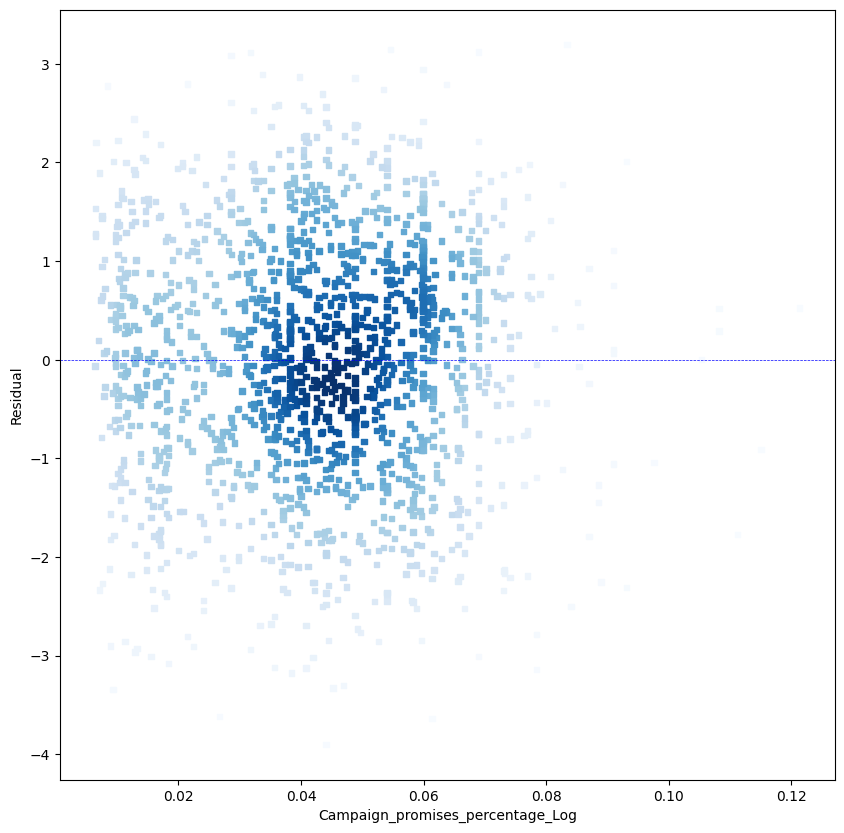

In [1294]:
x = 'Campaign_promises_percentage_Log'
y = np.array(model_robust_test.resid)
residule_plot(x, y, extract_data, remove_zero = 1)

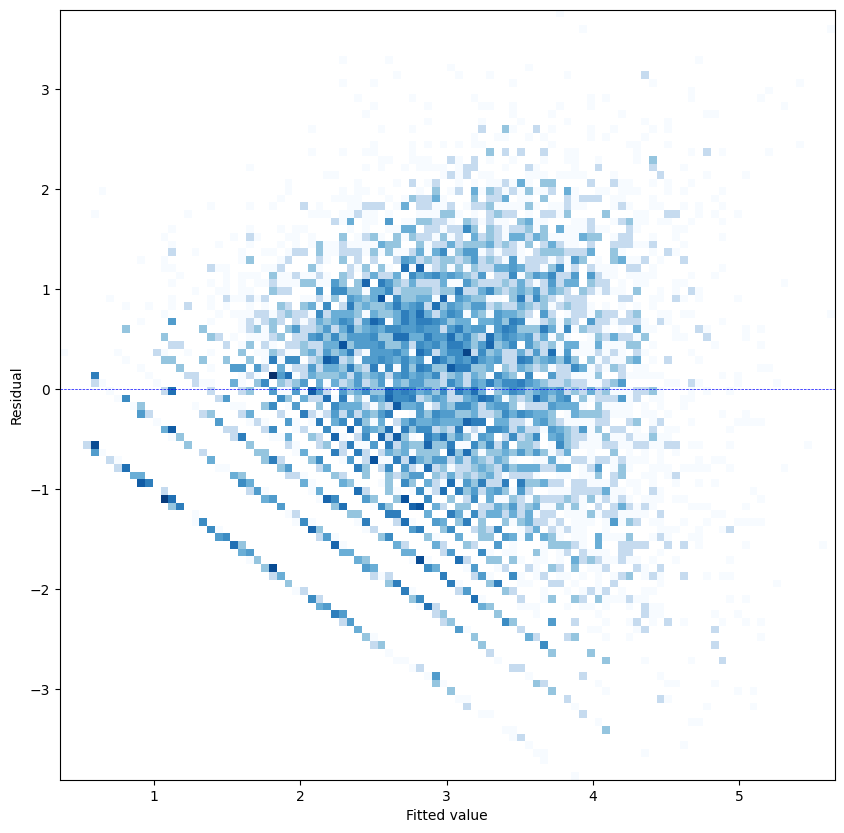

In [1295]:
from matplotlib.colors import LogNorm
y_pred = model_robust_test.predict(X)
x = np.array(model_robust_test.resid)
y =np.array(y_pred)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
# plt.scatter(y, x, marker=',', c=z, s=1, cmap='Blues' )
plt.figure(figsize=(10,10))

plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )

plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("Fitted value")
plt.ylabel("Residual")
#plt.savefig('Robust_test1_residule.png', dpi=2000)
plt.show()


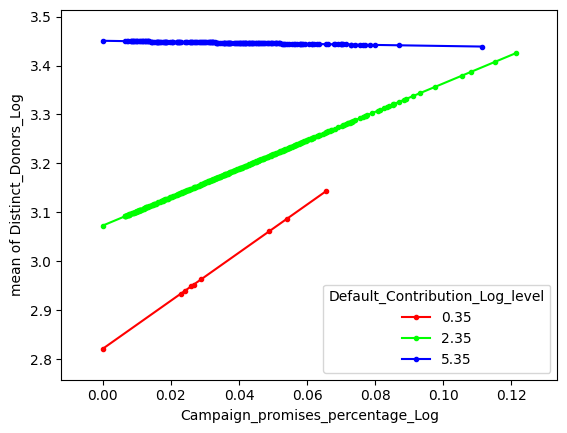

In [1298]:
DV = 'Distinct_Donors_Log'
interaction_variable1 = 'Campaign_promises_percentage_Log'
interaction_variable2_catergial = 'Default_Contribution_Log_level'
Interaction_plot(DV, interaction_variable1, interaction_variable2_catergial, extract_data)

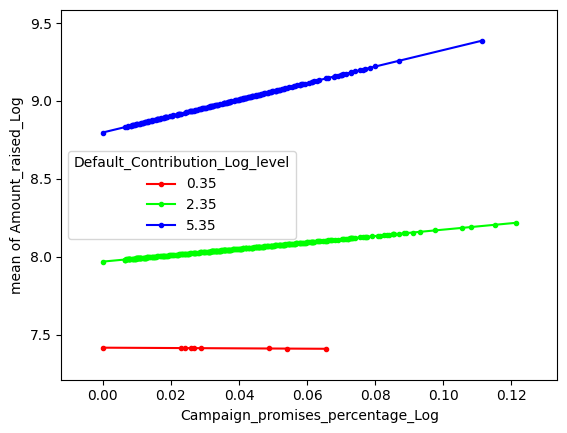

In [1299]:
DV = 'Amount_raised_Log'
interaction_variable1 = 'Campaign_promises_percentage_Log'
interaction_variable2_catergial = 'Default_Contribution_Log_level'
Interaction_plot(DV, interaction_variable1, interaction_variable2_catergial, extract_data)

In [1300]:
'''
Consumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]
Gender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female"]
Income = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100]

import pandas as pd
df6 = pd.DataFrame(
 {
   "Consumption": Consumption
 , "Gender": Gender
 , "Income": Income
 }
 )

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
Reg6 = ols(formula = "Consumption ~ Gender + Income", data = df6)
Fit6 = Reg6.fit()

Reg7 = ols(formula = "Consumption ~ Gender*Income", data = df6)
Fit7 = Reg7.fit()

from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(Income, Gender, Consumption,
             colors=['black','gray'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
fig = interaction_plot(Income, Gender, Fit6.fittedvalues,
             colors=['red','blue'], markers=['D','^'], ylabel='Consumption', xlabel='Income')
fig = interaction_plot(Income, Gender, Fit7.fittedvalues,
             colors=['green','orange'], markers=['D','^'], ylabel='Consumption', xlabel='Income')

import matplotlib.pyplot as plt
plt.show()
'''

'\nConsumption = [51, 52, 53, 54, 56, 57, 55, 56, 58, 59, 62, 63]\nGender  = ["Male", "Male", "Male", "Male", "Male", "Male", "Female", "Female", "Female", "Female", "Female", "Female"]\nIncome = [80, 80, 90, 90, 100, 100, 80, 80, 90, 90, 100, 100]\n\nimport pandas as pd\ndf6 = pd.DataFrame(\n {\n   "Consumption": Consumption\n , "Gender": Gender\n , "Income": Income\n }\n )\n\nfrom statsmodels.formula.api import ols\nfrom statsmodels.stats.anova import anova_lm\nReg6 = ols(formula = "Consumption ~ Gender + Income", data = df6)\nFit6 = Reg6.fit()\n\nReg7 = ols(formula = "Consumption ~ Gender*Income", data = df6)\nFit7 = Reg7.fit()\n\nfrom statsmodels.graphics.factorplots import interaction_plot\nfig = interaction_plot(Income, Gender, Consumption,\n             colors=[\'black\',\'gray\'], markers=[\'D\',\'^\'], ylabel=\'Consumption\', xlabel=\'Income\')\nfig = interaction_plot(Income, Gender, Fit6.fittedvalues,\n             colors=[\'red\',\'blue\'], markers=[\'D\',\'^\'], ylabel=\'Co

In [1301]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353
Predicted R2 : -6.910873667918411


<font face = "Time New Roman" size = 6> QQ plot

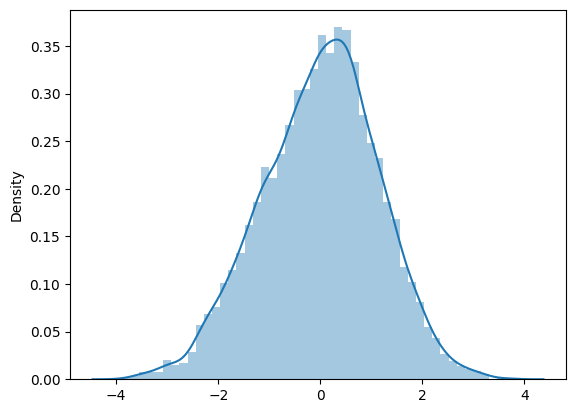

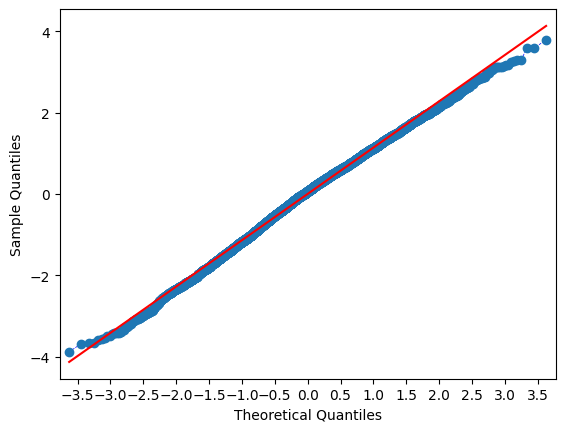

In [1302]:
ax = plt.axes()
res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法
sns.distplot(res)
plt.show()
probplot = sm.ProbPlot(res) # 实例probplt
probplot.qqplot(line='s', linestyle='--', lw=0.5) # 调用函数
x_major_locator=MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

# New robostness test 2 --- 6 Jun

In [1303]:
'''
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",
                    'Campaign_promises_percentage_Log_X_Default_Contribution_Log']

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Campaign_success']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X
'''

'\nModel1_variables = [\'Campaign_Goal_Log\', \'Tax_duction_status\', \'Campaign_Duration\',\n                     \'Campaign_Video\',  \'Number_of_images\',\'Words_of_campaigns\',\n                    "Creator_Type", \'Financial_Size\', "Sector_type", "Campaign_Start_Year_category",\n                    "Campaign_frequency", "Campaign_promises_percentage_Log", "Default_Contribution_Log",\n                    \'Campaign_promises_percentage_Log_X_Default_Contribution_Log\']\n\nimport statsmodels.formula.api as smf\nX = extract_data[Model1_variables] \nY = extract_data[\'Campaign_success\']\n# with statsmodels\nX = sm.add_constant(X) # adding a constant\nmodel1 = sm.OLS(Y, X).fit()\n\nresults1 = model1.summary()\n#predicts = model1._results\nprint(results1)\ny_true= Y\ny_pred = model1.predict(X)\nxs = X\n'

In [1304]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )


Residual Standard Error: 1.2999851842415353
Predicted R2 : -6.910873667918411


In [1305]:
extract_data.columns

Index(['Campaign_Id', 'Campaign_Title_x', 'Receiving_NPO_Name',
       'Receiving_NPO_Id', 'NPO_Status', 'Campaign_frequency',
       'Public_Campaign_Access', 'Creator_Type', 'Creator_Id',
       'Campaign_Status',
       ...
       'Campaign_success', 'Campaign_success_Log',
       'Campaign_promises_percentage_X_Default_Contribution_Log',
       'Campaign_promises_percentage_Log_level',
       'Campaign_promises_percentage_Log',
       'Campaign_promises_percentage_Log_X_Default_Contribution_Log',
       'Default_Contribution_Log_level', 'Campaign_promises_categoty',
       'Custom_amount_categoty', 'Sqr_Campaign_promises_percentage'],
      dtype='object', length=103)

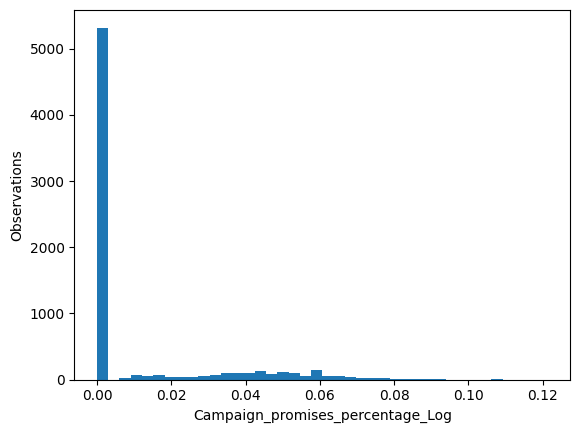

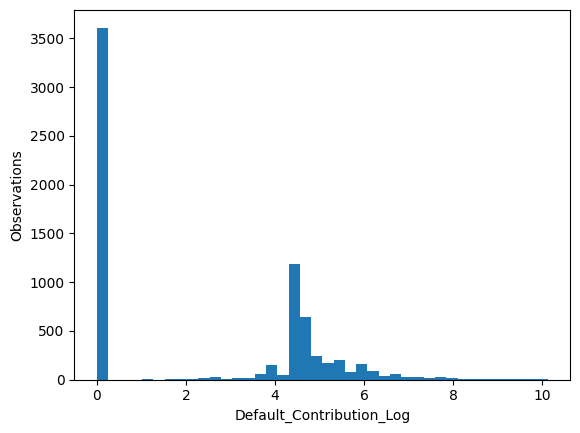

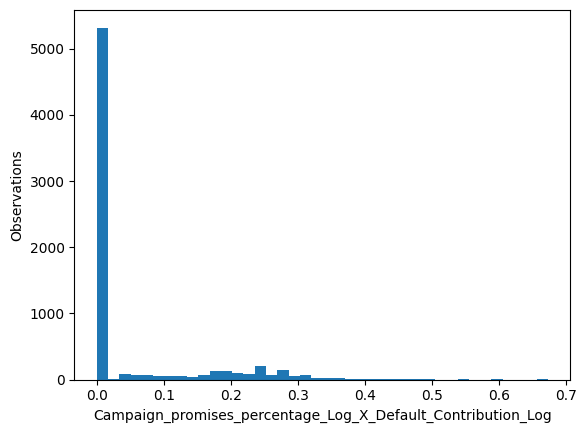

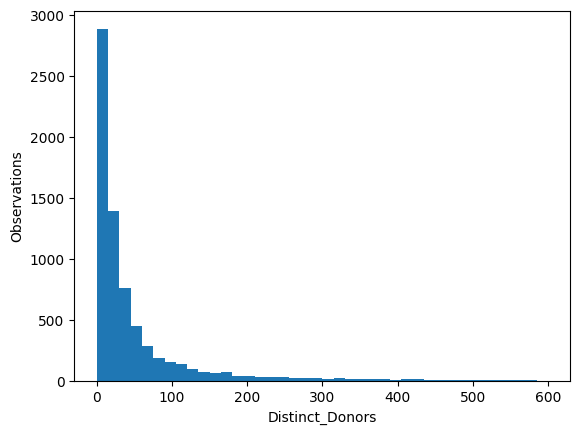

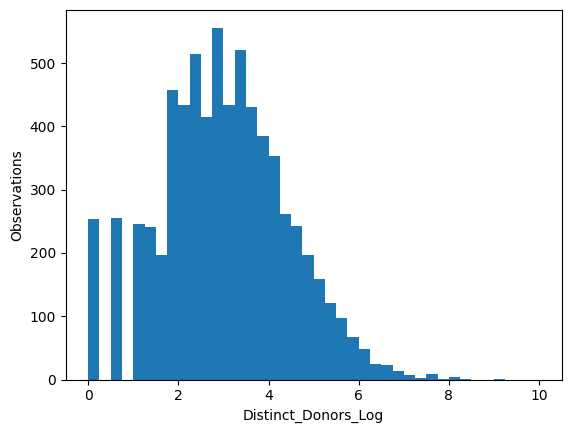

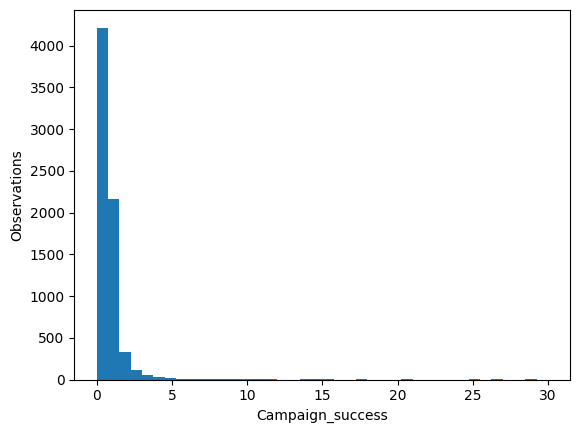

In [1306]:
#plt.figure(figsize=(20,20))

#plt.subplot(441)
plt.hist(extract_data['Campaign_promises_percentage_Log'], bins=40)
plt.xlabel('Campaign_promises_percentage_Log'); plt.ylabel('Observations')
plt.show()

#plt.subplot(442)
plt.hist(extract_data['Default_Contribution_Log'], bins=40 )
plt.xlabel('Default_Contribution_Log'); plt.ylabel('Observations')
plt.show()

#plt.subplot(449)
plt.hist(extract_data['Campaign_promises_percentage_Log_X_Default_Contribution_Log'], bins=40)
plt.xlabel('Campaign_promises_percentage_Log_X_Default_Contribution_Log'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Distinct_Donors'], bins=40, range=[0, 600])
plt.xlabel('Distinct_Donors'); plt.ylabel('Observations')
plt.show()

plt.hist(extract_data['Distinct_Donors_Log'], bins=40,  range=[0, 10])
plt.xlabel('Distinct_Donors_Log'); plt.ylabel('Observations')
plt.show()


plt.hist(extract_data['Campaign_success'], bins=40, range=[0, 30])
plt.xlabel('Campaign_success'); plt.ylabel('Observations')
plt.show()


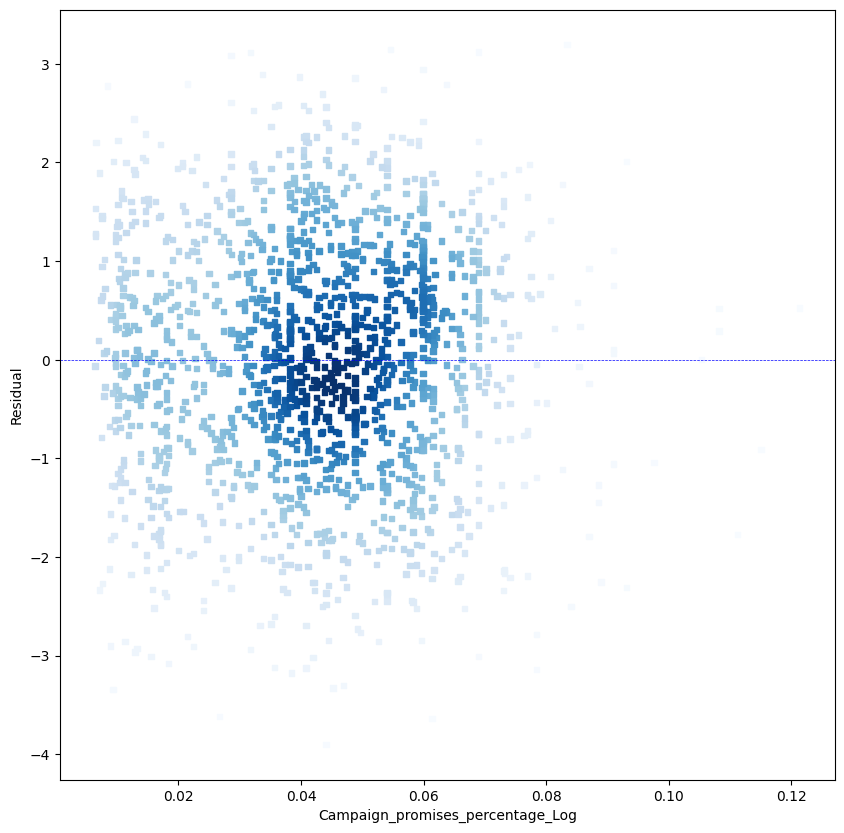

In [ ]:
x = 'Campaign_promises_percentage_Log'
y = model1.resid
residule_plot(x, y, extract_data, remove_zero = 1)

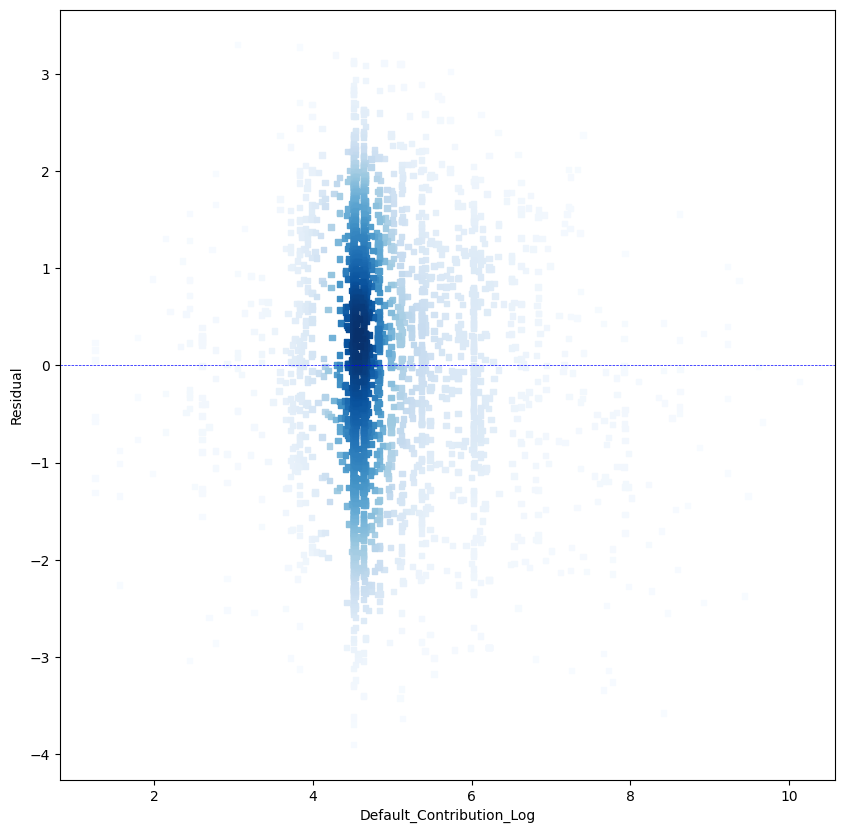

In [ ]:
x = 'Default_Contribution_Log'
y = model1.resid
residule_plot(x, y, extract_data, remove_zero = 1)

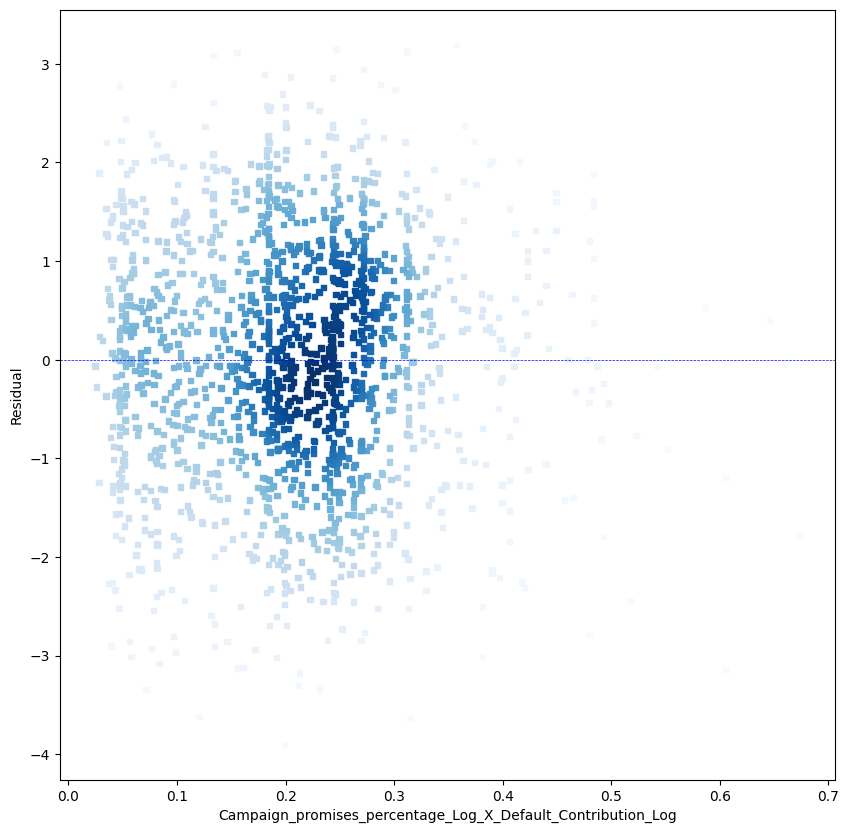

In [ ]:
x = 'Campaign_promises_percentage_Log_X_Default_Contribution_Log'
y = model1.resid
residule_plot(x, y, extract_data, remove_zero = 1)

# Stop here

In [ ]:
stop here

SyntaxError: invalid syntax (4067800170.py, line 1)

# Other codes used in past

In [ ]:
extract_data.shape

(6972, 114)

In [ ]:
short_list_campaigns = extract_data[extract_data['Campaign_promises_categoty'] == 1 ]

In [ ]:
short_list_campaigns.shape

(1651, 116)

In [ ]:
short_list_campaigns = short_list_campaigns[short_list_campaigns['Custom_amount_categoty'] == 1 ] 

In [ ]:
short_list_campaigns.shape

(1651, 116)

In [ ]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "Campaign_promises", "Default_Contribution_Log"]

import statsmodels.formula.api as smf
X = short_list_campaigns[Model1_variables] 
Y = short_list_campaigns['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.428
Model:                                    OLS   Adj. R-squared:                  0.424
Method:                         Least Squares   F-statistic:                     102.1
Date:                        Mon, 05 Jun 2023   Prob (F-statistic):          1.06e-188
Time:                                16:58:45   Log-Likelihood:                -2852.8
No. Observations:                        1651   AIC:                             5732.
Df Residuals:                            1638   BIC:                             5802.
Df Model:                                  12                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.8894558537607167
Predicted R2 : 0.41329028876287266


# 进行Box-Cox变换

In [ ]:
#进行Box-Cox变换
#box-cox
#stats.boxcox(data1)[0]
'''
extract_data['BC_Campaign_promises'] = extract_data['Campaign_promises']
extract_data['BC_Custom_amount'] = extract_data['Default_Contribution']

for index, row in extract_data.iterrows():
    if extract_data.loc[index,'BC_Campaign_promises'] == 0:
        extract_data.loc[index, "BC_Campaign_promises"] = 0.0001
    if extract_data.loc[index,'BC_Custom_amount'] == 0:
        extract_data.loc[index, "BC_Custom_amount"] = 0.0001
'''

In [ ]:
extract_data["BC_Campaign_promises"], best_lambda = stats.boxcox(extract_data["Campaign_promises"] + 0.00001)
extract_data["BC_Custom_amount"], best_lambda = stats.boxcox(extract_data["Default_Contribution"] + 0.00001)


In [ ]:
Model1_variables = ['Campaign_Goal_Log', 'Tax_duction_status', 'Campaign_Duration',
                     'Campaign_Video',  'Number_of_images','Words_of_campaigns',
                    "Creator_Type", 'Financial_Size', "Sector_type", "Campaign_Start_Year_category",
                    "Campaign_frequency", "BC_Campaign_promises", "BC_Custom_amount"]

import statsmodels.formula.api as smf
X = extract_data[Model1_variables] 
Y = extract_data['Amount_raised_Log']
# with statsmodels
X = sm.add_constant(X) # adding a constant
model1 = sm.OLS(Y, X).fit()

results1 = model1.summary()
#predicts = model1._results
print(results1)
y_true= Y
y_pred = model1.predict(X)
xs = X

                                OLS Regression Results                                
Dep. Variable:     Log_Actual_Donation_Amount   R-squared:                       0.488
Model:                                    OLS   Adj. R-squared:                  0.487
Method:                         Least Squares   F-statistic:                     510.1
Date:                        Mon, 05 Jun 2023   Prob (F-statistic):               0.00
Time:                                15:55:05   Log-Likelihood:                -11556.
No. Observations:                        6972   AIC:                         2.314e+04
Df Residuals:                            6958   BIC:                         2.324e+04
Df Model:                                  13                                         
Covariance Type:                    nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

In [ ]:
# Residual Standard Error of the model
print("Residual Standard Error: "+ str(model1.scale) )
print("Predicted R2 : "+ str(predicted_r2(y_true, y_pred, xs)) )

Residual Standard Error: 1.6146826687097922
Predicted R2 : 0.4857616243507188


In [ ]:
extract_data['BC_Campaign_promises'].unique()

array([ 9.99993472e-06, -1.07155770e+02,  1.37964635e+00,  1.60017509e+00,
        6.24644918e-01,  9.33178581e-01,  1.13002046e+00,  1.27121831e+00,
        1.46672268e+00,  1.53890544e+00,  1.65314449e+00])

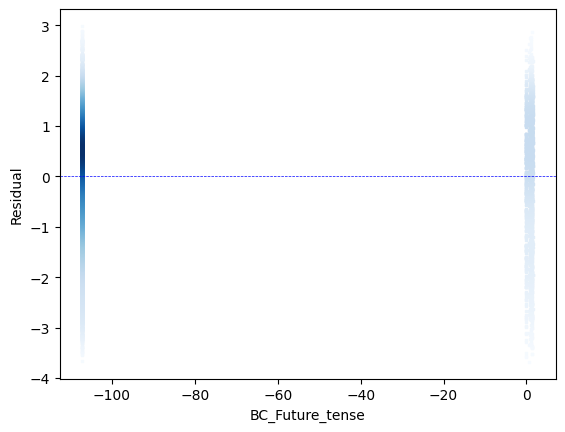

In [ ]:
IV1 = extract_data['BC_Campaign_promises']
#Interaction_v = extract_data.Campaign_promises_percentage_X_Default_Contribution_Log
x = np.array(model1.resid)
y =np.array(IV1)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
plt.scatter(y, x, marker=',', c=z, s=2, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("BC_Campaign_promises")
#plt.xlim((-0.5, 3))
plt.ylabel("Residual")
plt.show()

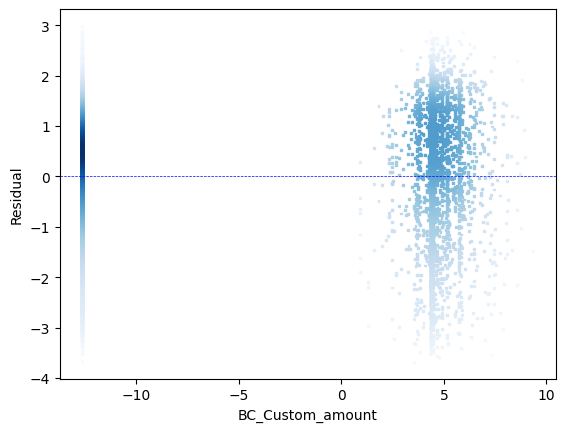

In [ ]:
IV2 = extract_data['BC_Custom_amount']
#Interaction_v = extract_data.Campaign_promises_percentage_X_Default_Contribution_Log
x = np.array(model1.resid)
y =np.array(IV2)
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
idx = z.argsort()
x = x[idx]
y = y[idx]
z = z[idx]
plt.scatter(y, x, marker=',', c=z, s=2, cmap='Blues' )
#plt.hist2d(y, x, bins=100, norm=LogNorm(), cmap='Blues' )
plt.axhline(y=0, color='b', linestyle='--', lw=0.5)
plt.xlabel("BC_Custom_amount")
#plt.xlim((-0.5, 11))
plt.ylabel("Residual")
plt.show()

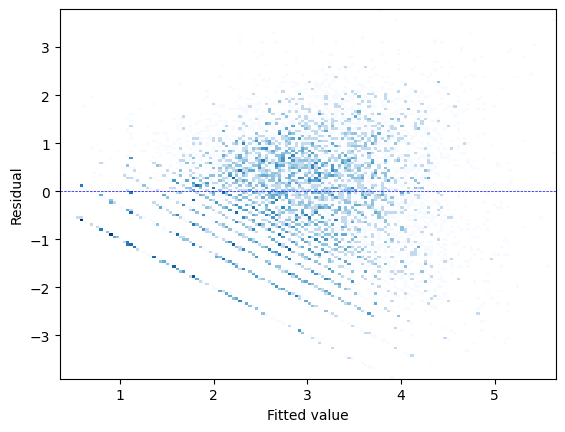

In [ ]:
min(extract_data["Campaign_promises"])

0

# QQ plot

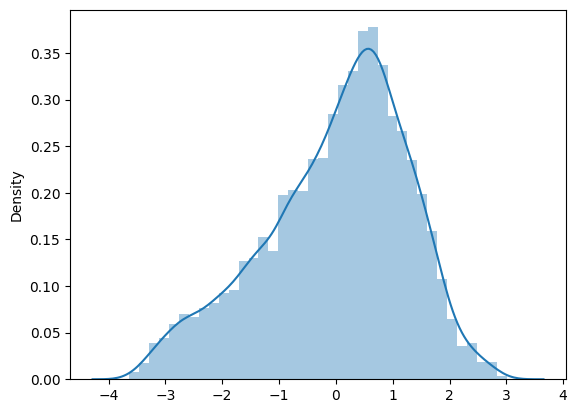

In [ ]:
import statsmodels.api as sm
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
# 样例1
ax = plt.axes()
res = model1.resid # 获取了构造的模型的残差，获取了数据
# 主要调用方法


sns.distplot(res)
plt.show()



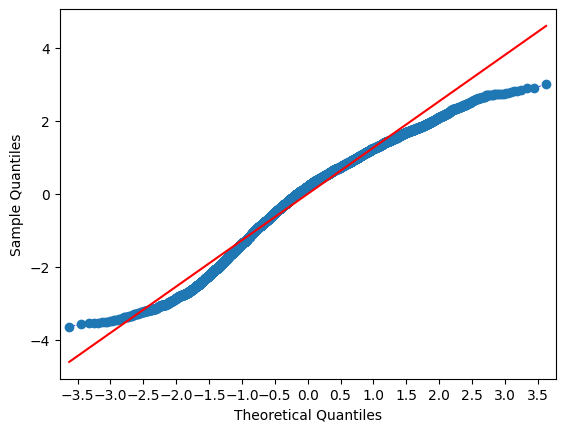

In [ ]:
probplot = sm.ProbPlot(res) # 实例probplot
probplot.qqplot(line='s', linestyle='--', lw=0.5) # 调用函数
x_major_locator=MultipleLocator(0.5)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.show()

Add Campaign_promises(not Campaign_promises_percentage) result

In [ ]:
import pandas as pd

df_X = extract_data[['Campaign_promises_percentage','Amount_raised_Log','Campaign_frequency']]
from pyprocessmacro import Process
p = Process(data=df_X, model=1, x="Campaign_promises_percentage", y="Amount_raised_Log",m=["Campaign_frequency"],controls_in="all_to_y")
p.summary()
       
import matplotlib.pyplot as plt
g = p.plot_conditional_direct_effects(x = 'Campaign_frequency')
plt.show()


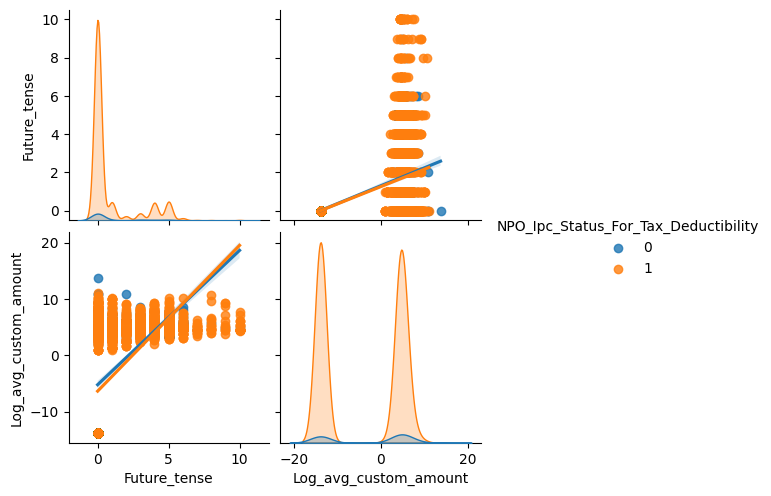

In [ ]:
import seaborn
seaborn.pairplot(extract_data, vars=['Campaign_promises','Default_Contribution_Log'],   kind='reg', hue='Tax_duction_status') 

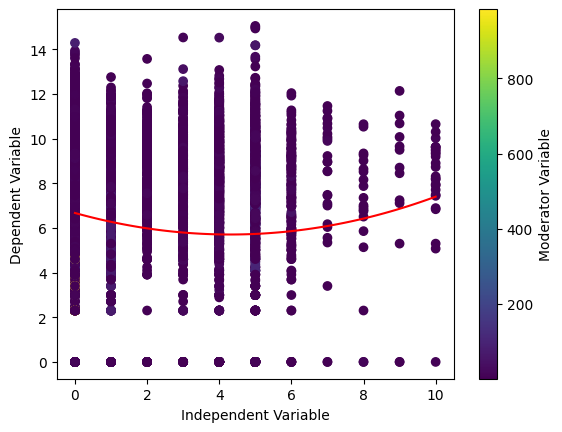

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
df = extract_data
extract_data['interaction_term'] = df['Campaign_promises'] * df['Campaign_frequency']\

X = sm.add_constant(df[['Campaign_promises', 'Campaign_frequency', 'interaction_term']])
model = sm.OLS(df['Amount_raised_Log'], X).fit()

independent_vals = np.linspace(df['Campaign_promises'].min(), df['Campaign_promises'].max(), 100)
moderator_vals = np.linspace(df['Campaign_frequency'].min(), df['Campaign_frequency'].max(), 100)
interaction_vals = independent_vals * moderator_vals
new_data = pd.DataFrame({'Campaign_promises': independent_vals, 'Campaign_frequency': moderator_vals, 'interaction_term': interaction_vals})
new_data = sm.add_constant(new_data)
new_data['predicted_dependent_variable'] = model.predict(new_data)

fig, ax = plt.subplots()
scatter = ax.scatter(df['Campaign_promises'], df['Amount_raised_Log'], c=df['Campaign_frequency'], cmap='viridis')
line = ax.plot(new_data['Campaign_promises'], new_data['predicted_dependent_variable'], color='red')
ax.set_xlabel('Independent Variable')
ax.set_ylabel('Dependent Variable')
fig.colorbar(scatter, label='Moderator Variable')
plt.show()


